<a href="https://colab.research.google.com/github/907Resident/caldera-gas-emissions/blob/logistic-prediction/site_differentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Site Differentation
How are the sites similar and/or different.

## Importing necessary libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import data
The data have been processed using code developed in MATLAB previously. The data is currently stored in a OneDrive directory. Therefore to access it, one will need to use [`onedrivesdk<2`](https://github.com/OneDrive/onedrive-sdk-python/blob/master/README.md#onedrive). This library will be able to tap into the OneDrive API. After user authentication, you can get the necesary files for this exercise. 

_need to return to get `onedrivesdk` working properly_

In [ ]:
#!pip install "onedrivesdk<2"

#### Yellowstone - Import data
Using manual file upload until issue #1 is resolved

In [2]:
# Manual File Upload from local drive
from google.colab import files
uploaded = files.upload()

Saving YNP_SummaryData.xlsx to YNP_SummaryData.xlsx


In [3]:
# Import file into workspace
import io
df_2018_YC = pd.read_excel(io.BytesIO(uploaded['YNP_SummaryData.xlsx']), 
                           sheet_name="2018",
                           header=0, parse_dates=True)
# Delete first row that contains secondary data information
df_2018_YC.drop([0], inplace=True)

# Reset index
df_2018_YC.reset_index(drop=True, inplace=True)

In [4]:
# Import file into workspace
df_2019_YC = pd.read_excel(io.BytesIO(uploaded['YNP_SummaryData.xlsx']), 
                           sheet_name="2019",
                           header=0)
# Delete first row that contains secondary data information
df_2019_YC.drop([0], inplace=True)

# Reset index
df_2019_YC.reset_index(drop=True, inplace=True)

#### Valles Caldera - Import Data
The data has been processed in the same way for Yellowstone.

In [5]:
# Manual File Upload from local drive
uploaded = files.upload()

Saving VC_SummaryData.xlsx to VC_SummaryData.xlsx


In [6]:
# Import file into workspace
df_2017_VC = pd.read_excel(io.BytesIO(uploaded['VC_SummaryData.xlsx']), 
                           sheet_name="2017",
                           header=0, parse_dates=True)
# Delete first row that contains secondary data information
df_2017_VC.drop([0], inplace=True)

# Reset index
df_2017_VC.reset_index(drop=True, inplace=True)

In [7]:
# Import file into workspace
df_2019_VC = pd.read_excel(io.BytesIO(uploaded['VC_SummaryData.xlsx']), 
                           sheet_name="2019",
                           header=0)
# Delete first row that contains secondary data information
df_2019_VC.drop([0], inplace=True)

# Reset index
df_2019_VC.reset_index(drop=True, inplace=True)

## Preprocessing and cleaning
Several cleaning steps are requireed to ensure correct data types, addressing missing data, and other cleaning activities.

In [10]:
# Assess the data types for the dataframe
df_2018_YC.dtypes

Site_Name                                         object
Group                                             object
Location                                          object
Soil_Classification                               object
Latitude                                          object
Longitude                                         object
Date_of_Measurement                               object
Start_Time_of_Chamber_Enclosure                   object
End_Time_of_Chamber_Enclosure                     object
Duration_of_Total_Chamber_Enclosure               object
Start_Time_Flux                                   object
End_Time_Flux                                     object
CH4_Flux                                          object
LowerBound_CH4_Flux                               object
UpperBound_CH4_Flux                               object
KP_d13CH4_source                                  object
KP_LowerBound_d13CH4_source                       object
KP_UpperBound_d13CH4_source    

From visual inspection of the data types, it appears that all columns have been set to `object`. Therefore, it will require a dictionary where, I have mannually set up.

In [11]:
def basic_preprocessing(df):
  # Set dictionary for correct data types
  data_types = {"Group":"category", 
              "Location":"object",
              "Soil_Classification":"category", 
              "Latitude":"float64","Longitude":"float64",
              "Date_of_Measurement":"datetime64",
              "Start_Time_of_Chamber_Enclosure":"datetime64", 
              "End_Time_of_Chamber_Enclosure":"datetime64",
              "Duration_of_Total_Chamber_Enclosure":"float64",
              "Start_Time_Flux":"datetime64",
              "End_Time_Flux":"datetime64",              
              "CH4_Flux":"float64",
              "LowerBound_CH4_Flux":"float64",
              "UpperBound_CH4_Flux":"float64",
              "KP_d13CH4_source":"float64",
              "KP_LowerBound_d13CH4_source":"float64",
              "KP_UpperBound_d13CH4_source":"float64",
              "d13CH4_source":"float64", 
              "d13CH4_LowerBound_source":"float64",
              "d13CH4_UpperBound_source":"float64",
              "CO2_Flux":"float64",
              "LowerBound_CO2_Flux":"float64",
              "UpperBound_CO2_Flux":"float64",
              "d13CO2_source":"float64",
              "KP_d13CO2_source":"float64",
              "KP_LowerBound_d13CO2_source":"float64",
              "KP_UpperBound_d13CO2_source":"float64",
              "d13CO2_source":"float64",
              "d13CO2_LowerBound_source":"float64",
              "d13CO2_UpperBound_source":"float64",
              "Horita_Geothermometer_Temperature_at_Formation":"float64",
              "Ambient_Temperature":"float64",
              "Barometric_Pressure":"float64",
              "Soil_Tempeature_at_Surface":"float64"}
  # Set data types accordingly
  df = df.astype(data_types)
  # Drop unnecessary columns
  df.drop(df.columns[30:33], axis=1, inplace=True)
  df.drop(df.columns[-1], axis=1, inplace=True)

  # Return data frame
  return df


Execute `basic_preprocessing()` to assign the correct data types and get rid of unncessary columns.

In [12]:
# Yellowstone
## 2018
df_2018_YC = basic_preprocessing(df_2018_YC)
## 2019
df_2019_YC = basic_preprocessing(df_2019_YC)

# Valles Caldera
## 2017
df_2017_VC = basic_preprocessing(df_2017_VC)
## 2019
df_2019_VC = basic_preprocessing(df_2019_VC)

Concatenate the dataframes from each respective campaign together chronologically. After this process there will be two dataframes, one for Yellowstone and the other for Valles.

In [13]:
# Concatenate 2018 & 2019 dataframes for Yellowstone
df_YC_all = pd.concat([df_2018_YC, df_2019_YC], ignore_index=True)

# Preview dataframe dimensions
YNP_all_shape = df_YC_all.shape
print(YNP_all_shape)

(154, 31)


In [14]:
# Concatenate 2017 & 2019 dataframes for Valles Caldera
df_VC_all = pd.concat([df_2017_VC, df_2019_VC], ignore_index=True)

# Preview dataframe dimensions
VCNP_all_shape = df_VC_all.shape
print(VCNP_all_shape)

(48, 31)


The groups need to be ordered to represen the geography. For Yellowstone, the groups are ordered from west to east, and for Valles, the groups are ordered from north to south.

In [15]:
# List the categories ordered from west to east for Yellowstone
ordered_groups_YC = ["Upper GB", "Lower GB", "Terrace Springs",
                     "Norris GB", "North of Norris GB",
                     "Mammoth HS","West Thumb GB",
                     "Gas Vents (Solfatara Springs)",
                     "Mud Volcano", "Eastern Yellowstone"]

# Order the groups from west to east
df_YC_all["Group"] = df_YC_all["Group"].astype("category")
df_YC_all["Group"].cat.reorder_categories(ordered_groups_YC, ordered=True,
                                          inplace=True)

In [16]:
# List the categories ordered from north to south at Valles Caldera
ordered_groups_VC = ["Alamo Canyon", "Sulphur Springs", "Redondo Peak", 
                  "Hummingbird", "Soda Dam"]
# Order the groups from north to south
df_VC_all["Group"] = df_VC_all["Group"].astype("category")
df_VC_all["Group"].cat.reorder_categories(ordered_groups_VC, ordered=True,
                                          inplace=True)

Add a category _Caldera_ that will be useful when combining data from both locations


In [17]:
# Yellowstone
df_YC_all["Caldera"] = "YNP"
df_YC_all["Caldera"] = df_YC_all["Caldera"].astype("category")
# Valles
df_VC_all["Caldera"] = "VCNP"
df_VC_all["Caldera"] = df_VC_all["Caldera"].astype("category")

Change the units for fluxes are presented in mg CH<sub>4</sub> m<sup>-2</sup> day<sup>-1</sup> and g CO<sub>2</sub>  m<sup>-2</sup> day<sup>-1</sup>.

In [18]:
# Convert Fluxes to mass m-2 per day
## F_CH4: mg m-2 day-1
df_YC_all["CH4_Flux"] = df_YC_all.CH4_Flux * 24
df_YC_all["LowerBound_CH4_Flux"] = df_YC_all.LowerBound_CH4_Flux * 24
df_YC_all["UpperBound_CH4_Flux"] = df_YC_all.UpperBound_CH4_Flux * 24
## F_CO2: g m-2 day-1
df_YC_all["CO2_Flux"] = (df_YC_all.CO2_Flux / 1000) * 24
df_YC_all["LowerBound_CO2_Flux"] = (df_YC_all.LowerBound_CO2_Flux / 1000) * 24
df_YC_all["UpperBound_CO2_Flux"] = (df_YC_all.UpperBound_CO2_Flux / 1000) * 24

In [19]:
# Convert Fluxes to mass m-2 per day
## F_CH4: mg m-2 day-1
df_VC_all["CH4_Flux"] = df_VC_all.CH4_Flux * 24
df_VC_all["LowerBound_CH4_Flux"] = df_VC_all.LowerBound_CH4_Flux * 24
df_VC_all["UpperBound_CH4_Flux"] = df_VC_all.UpperBound_CH4_Flux * 24
## F_CO2: g m-2 day-1
df_VC_all["CO2_Flux"] = (df_VC_all.CO2_Flux / 1000) * 24
df_VC_all["LowerBound_CO2_Flux"] = (df_VC_all.LowerBound_CO2_Flux / 1000) * 24
df_VC_all["UpperBound_CO2_Flux"] = (df_VC_all.UpperBound_CO2_Flux / 1000) * 24

Merge the Yellowstone and Valles daataframes together on the start time of chamber enclosure

In [20]:
from natsort import index_natsorted
# Merge data from both calderas together
df_all = pd.concat([df_YC_all, df_VC_all], ignore_index=True)
df_all.sort_values(by=["Start_Time_of_Chamber_Enclosure"],
                   key=lambda x: np.argsort(index_natsorted(df_all["Date_of_Measurement"])),
                   inplace=True)
# Reset index
df_all.reset_index(drop=True, inplace=True)
df_all.shape

(202, 32)

In [21]:
# Order "Group" by Yellowstone first and then Valles
ordered_groups_all = ordered_groups_YC + ordered_groups_VC
df_all["Group"] = df_all["Group"].astype("category")
df_all["Group"].cat.reorder_categories(ordered_groups_all, ordered=True,
                                       inplace=True)
# Order "Caldera" by Yellowstone and then Valles
df_all["Caldera"] = df_all["Caldera"].astype("category")
df_all["Caldera"].cat.reorder_categories(["YNP", "VCNP"], ordered=True,
                                         inplace=True)

## Analyze Flux and Isotope Compositions
To begin the exploratory data analysis process, we will visualize the two variables of interest, fluxes and carbon isotope (δ<sup>13</sup>C) compositions. The analysis will begin with site-by-site analysis and then examine geochemical groups.

In [22]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
# Point directory to correct place
%cd /content/gdrive/My Drive/Colab Notebooks/caldera-gases

/content/gdrive/My Drive/Colab Notebooks/caldera-gases


### Descriptive Statistics

Descriptive stats by group and soil classification for the Yellowstone fluxes and isotopes

In [24]:
# Descriptive Stats by Group
df_YC_descrip_grp = df_YC_all.groupby(by=["Group", "Soil_Classification"]) \
[["CH4_Flux", "CO2_Flux", "d13CH4_source", "d13CO2_source", 
  "Soil_Tempeature_at_Surface"]].describe()
df_YC_descrip_grp

CH4_Flux  ... Soil_Tempeature_at_Surface
                                                     count  ...                        max
Group                         Soil_Classification           ...                           
Upper GB                      Neutral-Chloride        27.0  ...                      30.60
Lower GB                      Neutral-Chloride         9.0  ...                      40.10
Terrace Springs               Travertine               6.0  ...                      32.80
Norris GB                     Neutral-Chloride        21.0  ...                      49.50
North of Norris GB            Acid-Sulphate            2.0  ...                      28.80
                              Neutral-Chloride         6.0  ...                      23.80
Mammoth HS                    Travertine              17.0  ...                      38.96
West Thumb GB                 Neutral-Chloride        11.0  ...                      40.10
Gas Vents (Solfatara Springs) Acid-Sulphate           22.0  ...                      75.80
Mud Volcano                   Acid-Sulphate           10.0  ...                      38.50
Eastern Yellowstone           Acid-Sulphate           15.0  ...                      73.80
                              Unclassified             8.0  ...                      40.00

[12 rows x 40 columns]

For Valles, the data is to be grouped by _Group_ name and summarized with descriptive statistics for the main four metrics

In [26]:
# Descriptive Stats by Group
df_VC_descrip_grp = df_VC_all.groupby(by=["Group", "Soil_Classification"]) \
[["CH4_Flux", "CO2_Flux", "d13CH4_source", "d13CO2_source", 
  "Soil_Tempeature_at_Surface"]].describe()
df_VC_descrip_grp

CH4_Flux              ... Soil_Tempeature_at_Surface      
                                       count        mean  ...                        75%   max
Group           Soil_Classification                       ...                                 
Alamo Canyon    Acid-Sulphate            8.0    4.860835  ...                     32.275  36.5
Sulphur Springs Acid-Sulphate           17.0  174.248623  ...                     27.900  30.2
Redondo Peak    Unclassified             7.0  111.304713  ...                     30.825  35.1
Hummingbird     Unclassified             9.0  177.327692  ...                     37.500  39.1
Soda Dam        Travertine               6.0   32.187519  ...                     35.050  48.3

[5 rows x 40 columns]

In [40]:
# Caldera level descriptive stats
df_all.groupby(by=["Caldera"])[["CH4_Flux", "CO2_Flux", "d13CH4_source",
                                "d13CO2_source", "Soil_Tempeature_at_Surface"]]\
                                .describe()

CH4_Flux                                    ... Soil_Tempeature_at_Surface                  
           count        mean         std       min  ...                        25%   50%   75%   max
Caldera                                             ...                                             
YNP        154.0   23.771475   76.445993 -4.022761  ...                     24.600  29.7  35.9  75.8
VCNP        47.0  118.496183  202.284492 -1.840104  ...                     26.525  29.8  33.2  48.3

[2 rows x 40 columns]

In [27]:
# Print the median values for fluxes
print("The median CH4 flux for YNP is {:.2f} mg m-2 day-1, \nand CO2 flux for YNP is {:.2f} g m-2 day-1\n".format(df_YC_all.CH4_Flux.agg(func=np.median), df_YC_all.CO2_Flux.agg(func=np.median)))
print("The median CH4 flux for VCNP is {:.2f} mg m-2 day-1, \nand CO2 flux for VCNP is {:.2f} g m-2 day-1\n".format(df_VC_all.CH4_Flux.agg(func=np.median), df_VC_all.CO2_Flux.agg(func=np.median)))

The median CH4 flux for YNP is -0.31 mg m-2 day-1, 
and CO2 flux for YNP is 14.37 g m-2 day-1

The median CH4 flux for VCNP is 22.72 mg m-2 day-1, 
and CO2 flux for VCNP is 264.97 g m-2 day-1



In [49]:
# Caldera level descriptive stats for fluxes greater than zero
df_all[(df_all["CH4_Flux"] > 0) | (df_all["CO2_Flux"] > 0)]\
.groupby(by=["Caldera"])\
[["CH4_Flux", "CO2_Flux", "d13CH4_source","d13CO2_source", 
  "Soil_Tempeature_at_Surface"]].describe()


CH4_Flux                                    ... Soil_Tempeature_at_Surface                   
           count        mean         std       min  ...                        25%   50%    75%   max
Caldera                                             ...                                              
YNP        150.0   24.430173   77.356610 -4.022761  ...                       24.6  29.7  35.65  75.8
VCNP        47.0  118.496183  202.284492 -1.840104  ...                       26.3  29.8  33.20  48.3

[2 rows x 40 columns]

In [68]:
eastern_YNP_and_VCNP = ["Gas Vents (Solfatara Springs)", "Mud Volcano",
                        "Eastern Yellowstone", "Alamo Canyon", 
                        "Sulphur Springs", "Redondo Peak", 
                        "Hummingbird", "Soda Dam"]                    
# Caldera level descriptive stats for fluxes in the eastern portion of YNP
df_all[df_all["Group"].isin(eastern_YNP_and_VCNP)]\
.groupby(by=["Caldera"])\
[["CH4_Flux", "CO2_Flux", "d13CH4_source","d13CO2_source", 
  "Soil_Tempeature_at_Surface"]].describe()


CH4_Flux                                    ... Soil_Tempeature_at_Surface                     
           count        mean         std       min  ...                        25%    50%     75%   max
Caldera                                             ...                                                
YNP         55.0   53.571878  120.854310 -2.810356  ...                     28.650  33.95  42.325  75.8
VCNP        47.0  118.496183  202.284492 -1.840104  ...                     26.525  29.80  33.200  48.3

[2 rows x 40 columns]

## Fluxes Summary

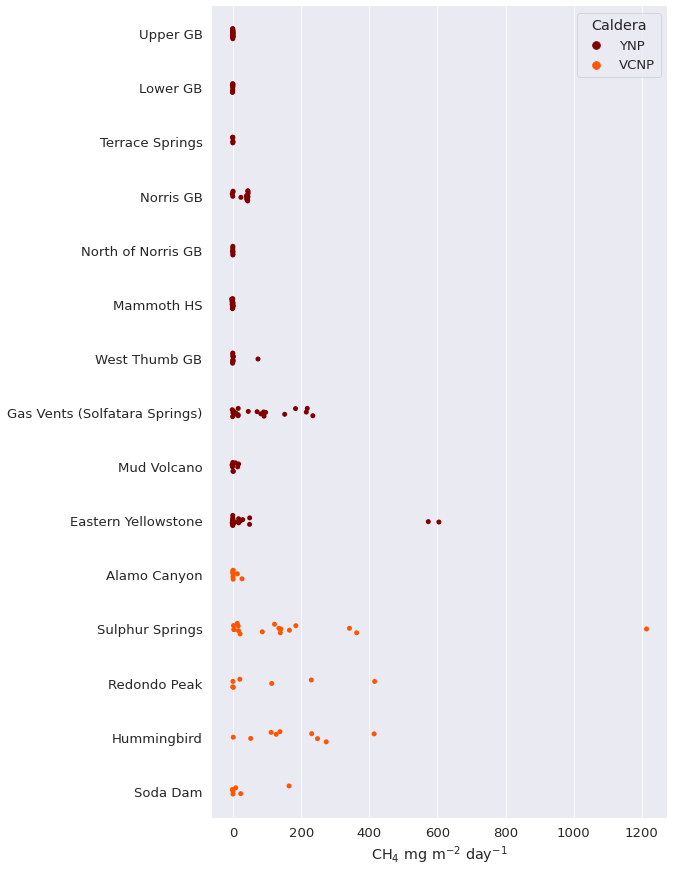

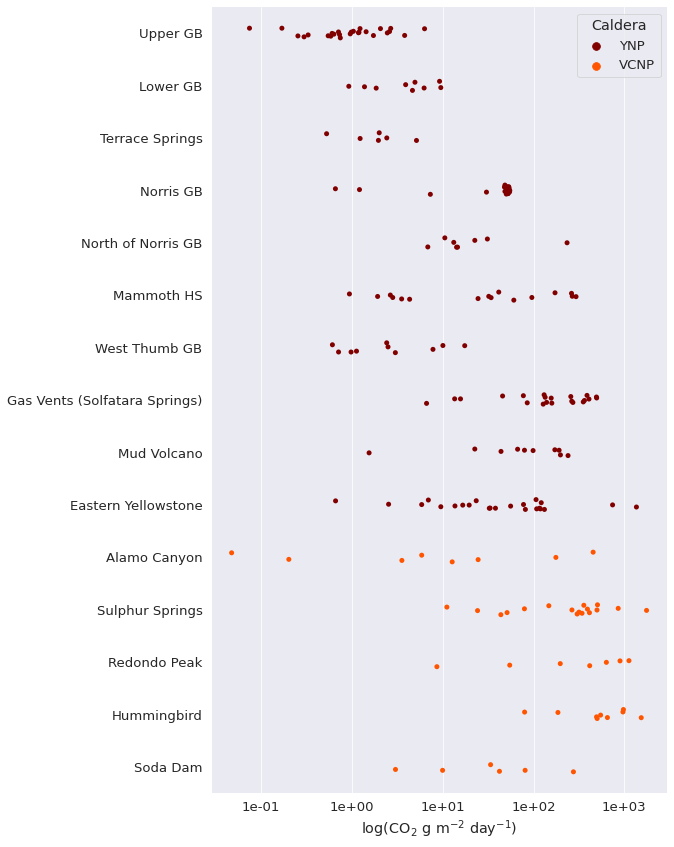

In [28]:
# Import axis formatting package
import matplotlib.ticker as ticker

# Set theme (e.g., visual style, color pallette, etc.)
sns.set_theme(context="paper", style="darkgrid", palette="tab10",
              font_scale=1.5)

# Strip plots fluxes by group (i.e. site)
## CH4 - Yellowstone
p_CH4_flx = sns.catplot(x="CH4_Flux", y="Group", data=df_all,
                        hue="Caldera", kind="strip",
                        orient="h", height=12, aspect=0.8,
                        legend_out=False, palette="gist_heat")
p_CH4_flx.set_axis_labels("CH$_4$ mg m$^{-2}$ day$^{-1}$", "")
p_CH4_flx.set(xscale="linear")
plt.savefig("figures/CH4_flx_all_strip.png", dpi=300)

## CO2 - Yellowstone
p_CO2_flx = sns.catplot(x="CO2_Flux", y="Group", data=df_all, 
                        kind="strip", hue="Caldera", orient="h", 
                        height=12, aspect=0.8,
                        palette="gist_heat", legend_out=False)
p_CO2_flx.set_axis_labels("log(CO$_2$ g m$^{-2}$ day$^{-1}$)", "")
p_CO2_flx.set(xscale="log")
for ax in p_CO2_flx.axes.flat:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:2.0e}'))
plt.tight_layout()
# Save plot to Google Drive Directory  
plt.savefig("figures/CO2_flx_all_strip.png", dpi=300)

Flux Figure: Strip plots of fluxes collected across YNP (darker) and VCNP (lighter). The data are sorted by groups labelled in the same fashion for Bergfeld et al. (2011) and Chiodini et al. (2012) for YNP and Goff and Janick (2002) for VCNP. Reading down the y-axis for the YNP measurements marks an east to west progression, and a north to south direction for VCNP.

The strip plots of CH<sub>4</sub> and CO2 fluxes (Figure ##) highlight the extent to which fluxes can vary at each site. There was a wide range of CH4 flux observations at YNP (19.24 ± 48.40 mg m<sup>-2</sup> day<sup>-1</sup>) with the maximum value (337 mg m<sup>-2</sup> day<sup>-1</sup>) occuring in the eastern portion (i.e. east of West Thumb) of the park. These exceptionally high fluxes occurred in the eastern regions supported by previous reports (Werner). In particular, acid-sulphate patches along the East Entrance Road (EETR) oustide of the caldera boundary, CH4 fluxes were very high (54.17 ± 114.31 mg m<sup>-2</sup> day<sup>-1</sup>). Similary within Gas Vents (also known as Solfatara Springs) (GVNT), fluxes of CH<sup>4</sup> varied greately but were also great in magnitude as well (49.45 ± 69.49 <sup>-2</sup> day<sup>-1</sup>). Apart from the high fluxes that occured in the eastern portion of YNP, most CH4 fluxes were relatively low (≤ 6 mg <sup>-2</sup> day<sup>-1</sup>) across YNP.

At VCNP, the CH<sub>4</sub> fluxes were very high in the acid-sulphate region along the western boundary of the caldera known as Sulphur Springs (VCSS). At VCSS, CH<sub>4</sub> fluxes had a similar distribution (124.95 ± 290.16 mg m<sup>-2</sup> day<sup>-1</sup>) as GVNT (Figure #_JoyPlot_#). However, the median flux at VCSS (121.88 mg m<sup>-2</sup> day<sup>-1</sup>, n = 17) was much greater than at GVNT (mg m<sup>-2</sup> day<sup>-1</sup>, n = 22). 

These CO<sub>2</sub> flux data from YNP align with previous work conducted by Werner and Brantley (2003), where the neutral-chloride sections (e.g. Upper and Lower GB) were low in CO<sub>2</sub> and the acid-sulphate regions distinguished themselves with higher fluxes (Figure ## and #_scatter plot by soil classification_#). Results from this study at Mud Volacano (MDVC) (95.20 ± 67.88 g <sup>-2</sup> day<sup>-1</sup>) are within the same order of magnitude presented in Werner and Brantley (2003). However, measurements in the acid-sulphate region at Gas Vents (147.71 ± 119.30 g <sup>-2</sup> day<sup>-1</sup>) eclipse the those from MDVC and all other sites across YNP suggesting that the site is significant source of diffuse CO2. 

At VCNP, the CO<sub>2</sub>

In [29]:
# Function to add "n= ##" to horizontal boxplots
## Does not work quite right yet [31 Mar 2021]
def add_nobvs_hboxplt(df, group, metric, palatte):
  fig, ax = plt.subplots(figsize = (10, 8))
  ax = sns.boxplot(y=group, x=metric, hue="Caldera", data=df_all,
                   palette=palatte)
  ax.set_xlim(-150,)
  medians = df.groupby([group])[metric].min().values-60
  nobs = df[metric].value_counts().values
  nobs = [str(x) for x in nobs.tolist()]
  nobs = ["n= " + i for i in nobs] 
  pos = range(len(nobs))
  for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(medians[tick], tick, nobs[tick], size="x-small",
            color='black', verticalalignment = "bottom",
            horizontalalignment="center", rotation=0)
  return ax

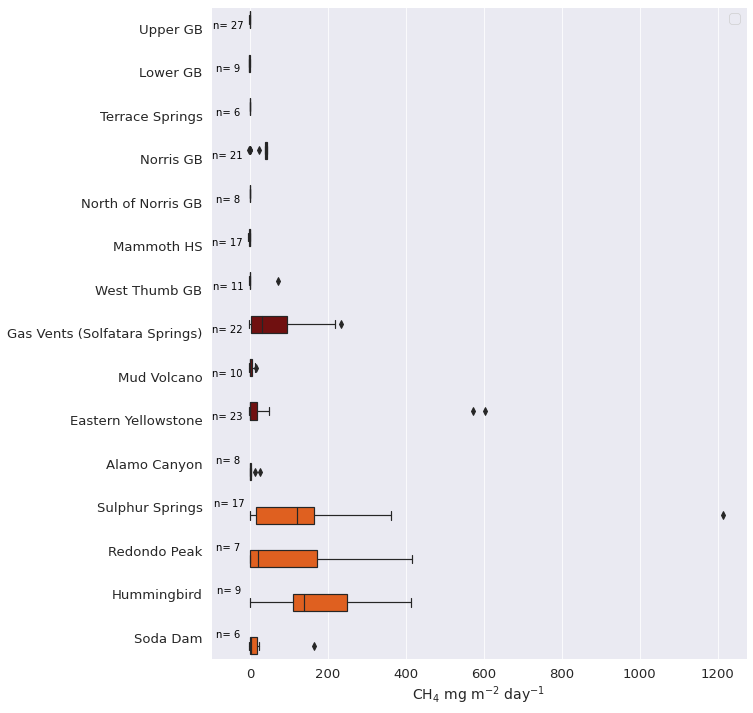

In [30]:
fig, p_CH4_flx = plt.subplots(figsize = (0.8*12, 12))
p_CH4_flx = sns.boxplot(y="Group", x="CH4_Flux", hue="Caldera",
                        data=df_all, palette="gist_heat")
p_CH4_flx.set_xlim(-100,)
mins = df_all.groupby(["Group"])["CH4_Flux"].min().values-55
nobs = df_all.groupby(["Group"])["CH4_Flux"].count()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n= " + i for i in nobs] 
pos = range(len(nobs))
for tick,label in zip(pos,p_CH4_flx.get_yticklabels()):
  p_CH4_flx.text(mins[tick], tick, nobs[tick], size="x-small",
                 color='black', verticalalignment = "baseline",
                 horizontalalignment="center", rotation=0)
p_CH4_flx.set_xlabel("CH$_4$ mg m$^{-2}$ day$^{-1}$", fontsize=14)
p_CH4_flx.set_ylabel("")
p_CH4_flx.legend("")
plt.savefig("figures/CH4_flx_all_box_nobvs.png", dpi=300)

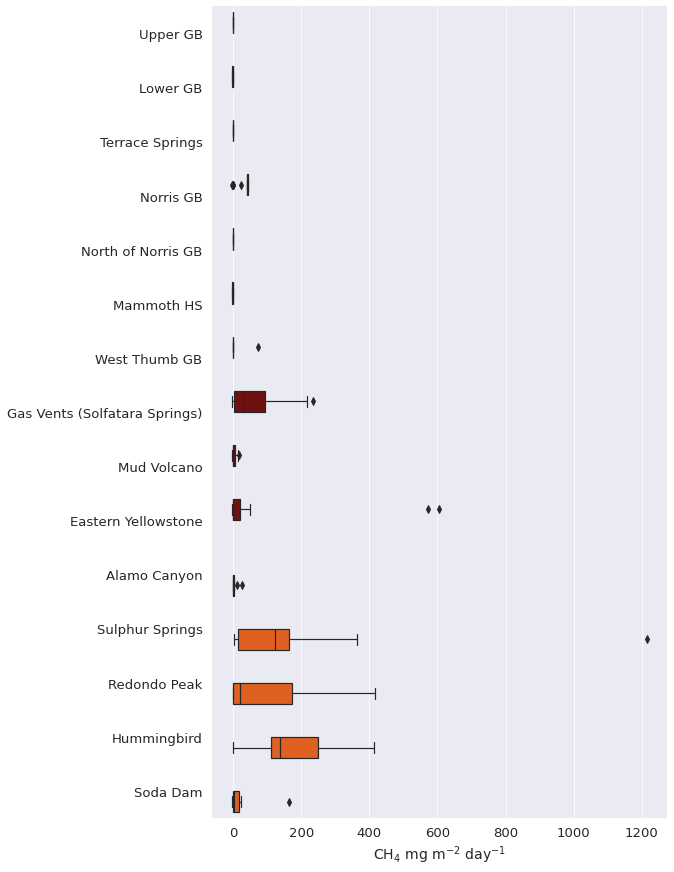

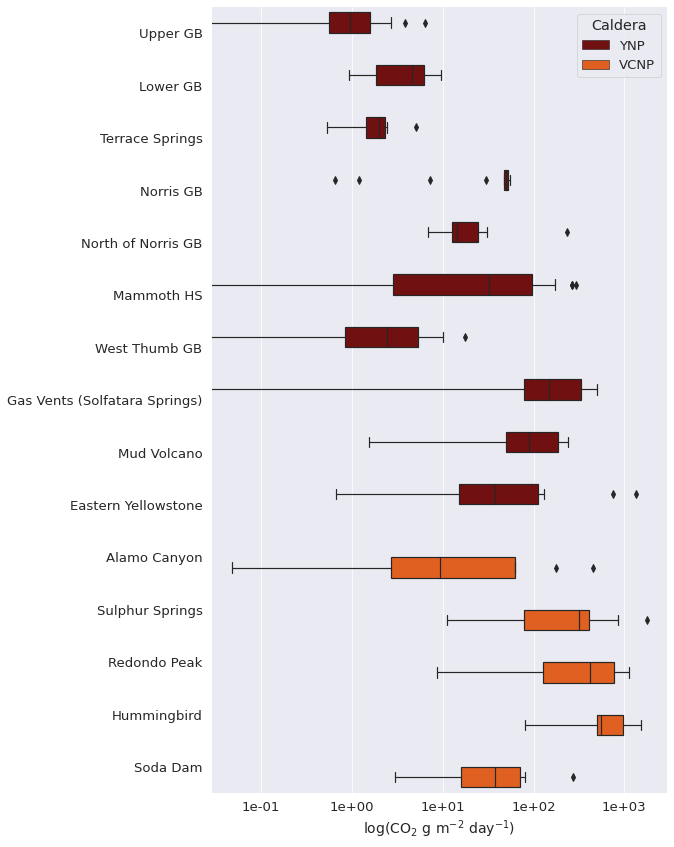

In [31]:
# Boxplots fluxes by group (i.e. site)
## CH4 - Yellowstone
p_CH4_flx = sns.catplot(x="CH4_Flux", y="Group", data=df_all,
                        hue="Caldera", kind="box", palette="gist_heat",
                        orient="h", height=12, aspect=0.8,
                        legend=False, legend_out=False)
p_CH4_flx.set_axis_labels("CH$_4$ mg m$^{-2}$ day$^{-1}$", "", fontsize=14)
p_CH4_flx.set(xscale="linear")
plt.savefig("figures/CH4_flx_all_box.png", dpi=300)

## CO2 - Yellowstone
p_CO2_flx = sns.catplot(x="CO2_Flux", y="Group", data=df_all, kind="box",
                        hue="Caldera", orient="h", height=12, aspect=0.8,
                        legend_out=False, palette="gist_heat")
p_CO2_flx.set_axis_labels("log(CO$_2$ g m$^{-2}$ day$^{-1}$)", "", fontsize=14)
p_CO2_flx.set(xscale="log")
for ax in p_CO2_flx.axes.flat:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:2.0e}'))
plt.tight_layout()
# Save plot to Google Drive Directory  
plt.savefig("figures/CO2_flx_all_box.png", dpi=300)

Boxplots of fluxes: caption for the strip plots applies here



### Partitioning Fluxes by Magnitude

Examine the fluxes by proportion of flux type. Using graphic statistical analysis (GSA) (Chiodini et al., 2012; Sinclair (1974), Wen et al., 2016), the fluxes can be partitioned into different flux categories such as low flux (LF), moderate flux (MF), and high flux (HF). These flux categories highlight the likely mode of transport to the surface (e.g., passing through sinter or a fracture). (---this needs to be rewritten---) 

This process relies on the fact that the fluxes are distributed lognormally. The lognormally distrbuted fluxes are plotted against the cumulative frequency (also known as the non-exceedence probability) highlights the proportion of fluxes that are less than or equal to the cumulative frequency, and the inflection points demonstrate flux values that correspond to different flux categories as described above. 

This process begins by defining the distribution of fit for the flux data. The data were first plotted using a histogram to gain a visual sense of the likely distribution. For CH4 ---, and CO2 was skewed left suggesting that a lognormal population with σ > µ is possible. To prove that the distribution

In [ ]:
# Retain rows that report a flux that is ≥ 0 for either gas
df_YC_flx_trim = df_YC_all[(df_YC_all["CH4_Flux"] >= 0) | 
                           (df_YC_all["CO2_Flux"] >= 0)]
# Assess the shape of the trimmed dataframe
YNP_flx_trim_shape = df_YC_flx_trim.shape
print("After fluxes less than zero are removed from the dataframe, \nthe number of rows and columns present are {} and {}, respectively.".format(YNP_flx_trim_shape[0], YNP_flx_trim_shape[1]))

After fluxes less than zero are removed from the dataframe, 
the number of rows and columns present are 150 and 32, respectively.


In [ ]:
# Retain rows that report a flux that is ≥ 0 for either gas
df_VC_flx_trim = df_VC_all[(df_VC_all["CH4_Flux"] >= 0) | 
                           (df_VC_all["CO2_Flux"] >= 0)]
# Assess the shape of the trimmed dataframe
VCNP_flx_trim_shape = df_VC_flx_trim.shape
print("After fluxes less than zero are removed from the dataframe, \nthe number of rows and columns present are {} and {}, respectively.".format(VCNP_flx_trim_shape[0], VCNP_flx_trim_shape[1]))

After fluxes less than zero are removed from the dataframe, 
the number of rows and columns present are 47 and 32, respectively.


In [ ]:
# Quantify the number of measurements lost due to removing fluxes less than zero
def perc_diff(val1, val2):
  '''
  Using the number of rows from the original concatenated dataframe and the 
  trimmed dataframe, quantify the percent difference between the number of 
  rows lost
  ''' 
  diff = val1 - val2
  diff = np.absolute(diff)
  sum_val = val1 + val2
  perc_diff = (diff / (sum_val / 2)) * 100
  return perc_diff


In [ ]:
flx_trim_loss = perc_diff(YNP_flx_trim_shape[0], YNP_all_shape[0])
### Report the percentage of lost fluxes
print("{:.1f}% of fluxes were lost when values less than zero were removed".format(flx_trim_loss))

2.6% of fluxes were lost when values less than zero were removed


In [ ]:
flx_trim_loss = perc_diff(VCNP_flx_trim_shape[0], VCNP_all_shape[0])
### Report the percentage of lost fluxes
print("{:.1f}% of fluxes were lost when values less than zero were removed".format(flx_trim_loss))

2.1% of fluxes were lost when values less than zero were removed


#### Visuzlize the Distribution of Fluxes
With density plots, visualize the spread of fluxes by caldera and by site

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


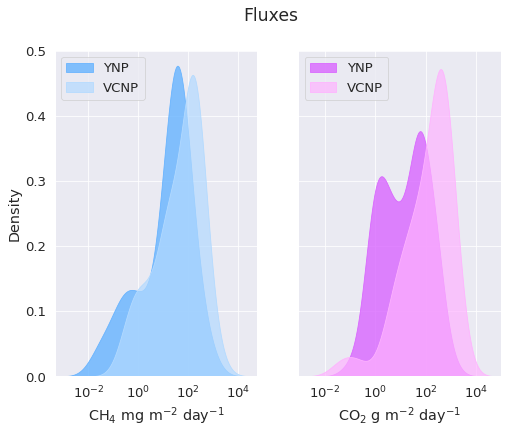

<Figure size 432x288 with 0 Axes>

In [ ]:
# Establish the color for CH4 (blue) and CO2 (magenta) with hexdecimal codes
CH4_color1 = "#66b3ff"
CO2_color1 = "#d966ff"
CH4_color2 = "#b3daff"
CO2_color2 = "#ffb3ff"

# Visualize the fluxes as histograms
# Plot histograms
fig, ax = plt.subplots(1,2,figsize=(8,6), sharey=True)
## All CH4
### Yellowstone
sns.kdeplot(df_YC_flx_trim.CH4_Flux, color=CH4_color1,
            shade=True, alpha=0.8, log_scale=True, ax=ax[0])
### Valles Caldera
sns.kdeplot(df_VC_flx_trim.CH4_Flux, color=CH4_color2,
            shade=True, alpha=0.7, log_scale=True, ax=ax[0])
ax[0].legend(["YNP", "VCNP"], loc="upper left", ncol=1)
ax[0].set_xlabel("CH$_4$ mg m$^{-2}$ day$^{-1}$")
ax[0].set_ylabel("Density")

## All CO2
### Yellowstone
sns.kdeplot(df_YC_flx_trim.CO2_Flux, color=CO2_color1,
            shade=True, alpha=0.8, log_scale=True, ax=ax[1])
### Valles Caldera
sns.kdeplot(df_VC_flx_trim.CO2_Flux, color=CO2_color2,
            shade=True, alpha=0.7, log_scale=True, ax=ax[1])
ax[1].legend(["YNP", "VCNP"], loc="upper left", ncol=1)
ax[1].set_xlabel("CO$_2$ g m$^{-2}$ day$^{-1}$")
plt.suptitle("Fluxes")
plt.show()
plt.savefig("figures/CH4-CO2_flx_all_caldera_kde.png", dpi=300)

KDE Plot of Fluxes: Kernel density estimate (KDE) plots approximates the probability density function for CH<sub>4</sub> and CO<sub>2</sub>. All fluxes greater than zero are presented for YNP darker shade; _n_ = 150) and VCNP (lighter shade; _n_ = 47). Note: mass units for CH<sub>4</sub> are in mg and g for CO<sub>2</sub>.

The distribution of CH<sub>4</sub> fluxes for both calderas are similar in shape although the slightly greater median for VCNP () than YNP (). The shape of the KDE plots indicates a primary bump that peaks near their respective medians, and there is a smaller peak to the left of the primary peak (see ridgeplot text for details).

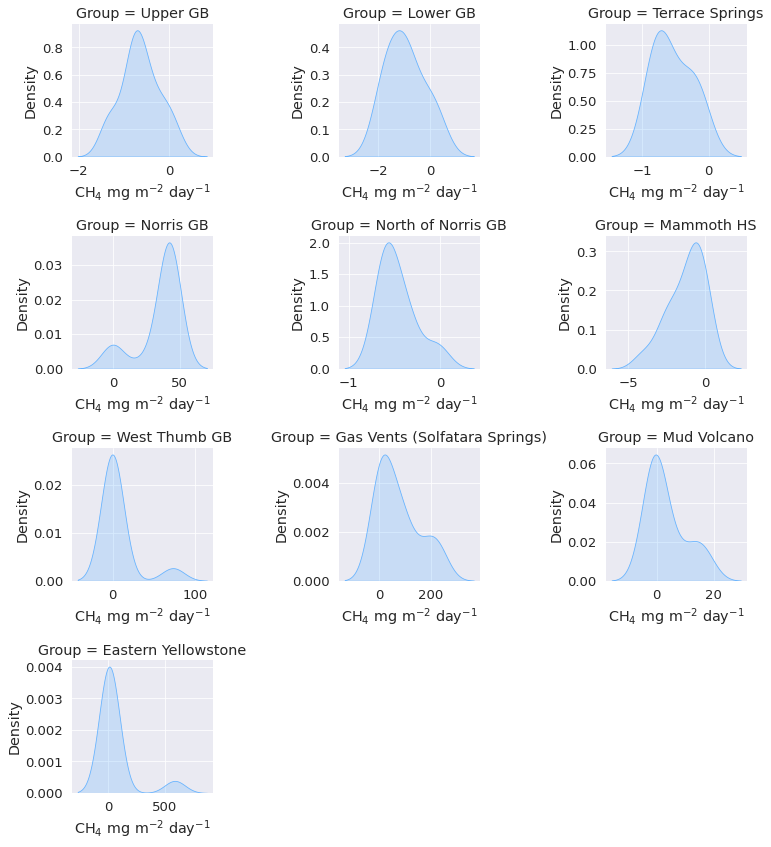

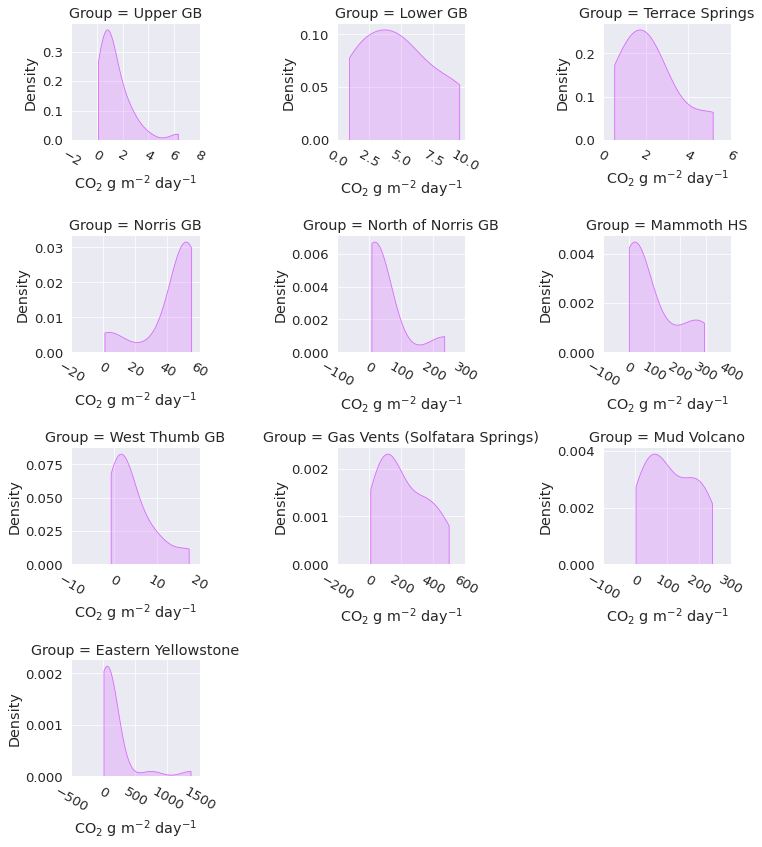

In [ ]:
# Flux Histograms by Site
## CH4
fg1 = sns.FacetGrid(df_YC_flx_trim,
                   col="Group", col_wrap=3,
                   height=3, aspect=1.2,
                   col_order=ordered_groups_YC,
                   sharex=False,sharey=False)
fg1.map_dataframe(sns.kdeplot, x="CH4_Flux",
                 color=CH4_color1, shade=True)
fg1.set(xlabel="CH$_4$ mg m$^{-2}$ day$^{-1}$",
       ylabel="Density")
fg1.tight_layout()
plt.savefig("figures/YNP_CH4_flx_kde.png", dpi=300)

## CO2
fg2 = sns.FacetGrid(df_YC_flx_trim,
                    col="Group", col_wrap=3, 
                    height=3, aspect=1.2,
                    col_order=ordered_groups_YC,
                    sharex=False, sharey=False)
fg2.map_dataframe(sns.kdeplot, x="CO2_Flux",
                  color=CO2_color1, shade=True, cut=0)
fg2.set(xlabel="CO$_2$ g m$^{-2}$ day$^{-1}$",
        ylabel="Density")
fg2.set_xticklabels(rotation=-30)
fg2.tight_layout()
plt.savefig("figures/YNP_CO2_flx_kde.png", dpi=300)

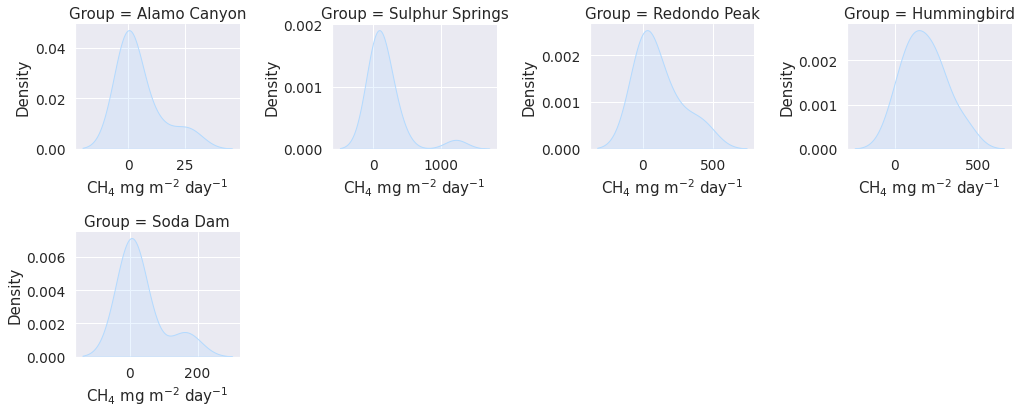

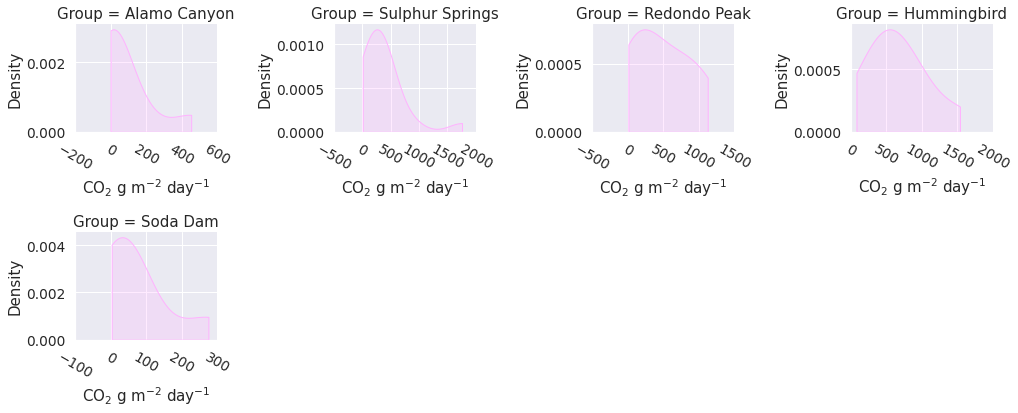

In [ ]:
# Flux Histograms by Site
## CH4
fg1 = sns.FacetGrid(df_VC_flx_trim,
                   col="Group", col_wrap=4, height=3,aspect=1.2,
                   col_order=ordered_groups_VC,
                   sharex=False,sharey=False)
fg1.map_dataframe(sns.kdeplot, x="CH4_Flux",
                 color=CH4_color2, shade=True)
fg1.set(xlabel="CH$_4$ mg m$^{-2}$ day$^{-1}$",
       ylabel="Density")
fg1.tight_layout()
plt.savefig("figures/VCNP_CH4_flx_kde.png", dpi=300)

## CO2
fg2 = sns.FacetGrid(df_VC_flx_trim,
                   col="Group", col_wrap=4, height=3,aspect=1.2,
                   col_order=ordered_groups_VC,
                   sharex=False, sharey=False)
fg2.map_dataframe(sns.kdeplot, x="CO2_Flux", cut=0,
                 color=CO2_color2, shade=True)
fg2.set(xlabel="CO$_2$ g m$^{-2}$ day$^{-1}$",
       ylabel="Density")
fg2.set_xticklabels(rotation=-30)
fg2.tight_layout()
plt.savefig("figures/VCNP_CO2_flx_kde.png", dpi=300)

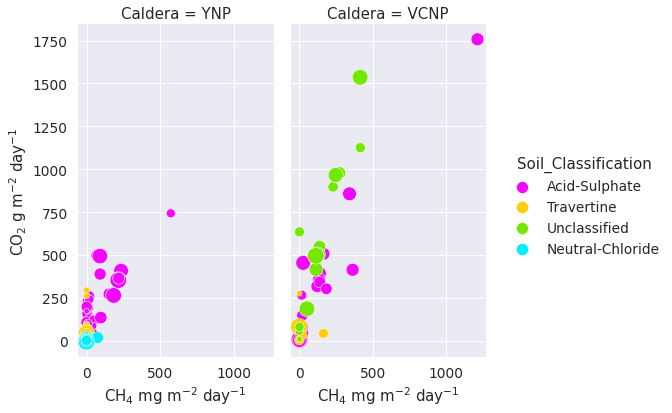

In [ ]:
# CO2 FLux v CH4 Flux at both calderas
fg = sns.FacetGrid(df_all,
                   col="Caldera", height=6, aspect=0.6,
                   hue="Soil_Classification", legend_out=True,
                   palette="gist_ncar_r",
                   sharex=True,sharey=True)
fg.map_dataframe(sns.scatterplot, x="CH4_Flux", y="CO2_Flux",
                 size="Soil_Tempeature_at_Surface", sizes=(10,275),
                 legend="brief")
fg.set(xlabel="CH$_4$ mg m$^{-2}$ day$^{-1}$",
       ylabel="CO$_2$ g m$^{-2}$ day$^{-1}$")
                    borderaxespad=0.)
fg.add_legend()
fg.tight_layout()
plt.savefig("figures/all_CO2vCH4_flx_soiltype.png", dpi=300)

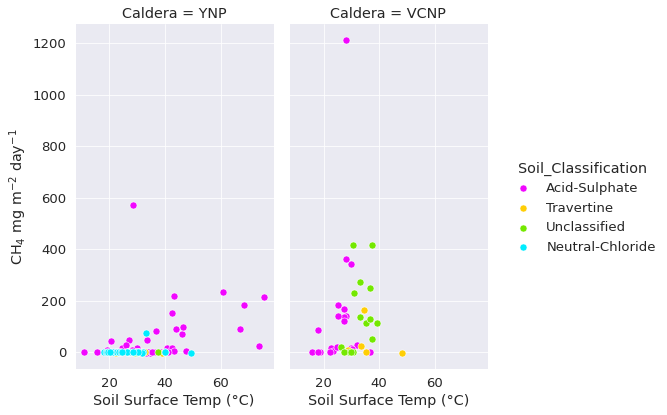

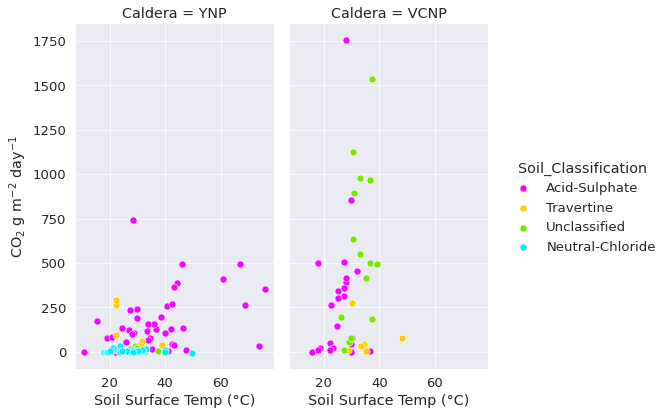

In [ ]:
# CH4 Flux v Soil Temp
fg = sns.FacetGrid(df_all,
                   col="Caldera", height=6, aspect=0.6,
                   hue="Soil_Classification", legend_out=True,
                   palette="gist_ncar_r",
                   sharex=True,sharey=True)
fg.map_dataframe(sns.scatterplot,
                 s=50,
                 x="Soil_Tempeature_at_Surface", y="CH4_Flux",
                 legend="brief")
fg.set(xlabel="Soil Surface Temp (°C)",
       ylabel="CH$_4$ mg m$^{-2}$ day$^{-1}$")
fg.add_legend()
fg.tight_layout()
plt.savefig("figures/all_CH4_flx_soiltemp_caldera.png", dpi=300)

# CO2 Flux v Soil Temp
fg = sns.FacetGrid(df_all,
                   col="Caldera", height=6, aspect=0.6,
                   hue="Soil_Classification", legend_out=True,
                   palette="gist_ncar_r",
                   sharex=True,sharey=True)
fg.map_dataframe(sns.scatterplot, 
                 s=50,
                 x="Soil_Tempeature_at_Surface", y="CO2_Flux",
                 legend="brief")
fg.set(xlabel="Soil Surface Temp (°C)",
       ylabel="CO$_2$ g m$^{-2}$ day$^{-1}$")
fg.add_legend()
fg.tight_layout()
plt.savefig("figures/all_CH4_flx_soiltemp_caldera.png", dpi=300)

In [ ]:
# Install joypy for ridgeplots
%pip install joypy
# import package
from joypy import joyplot

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/joy

<Figure size 432x288 with 0 Axes>

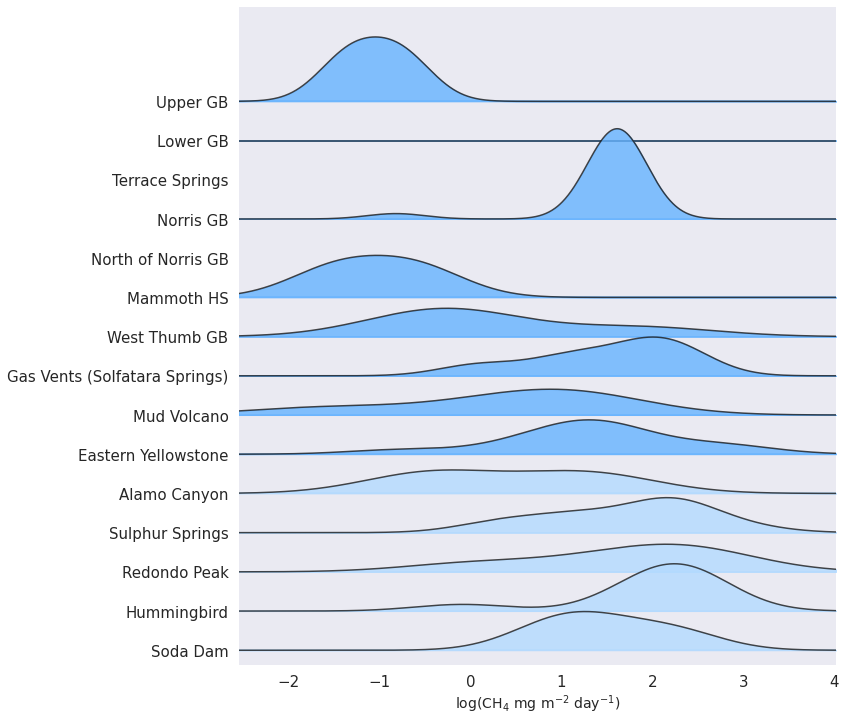

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

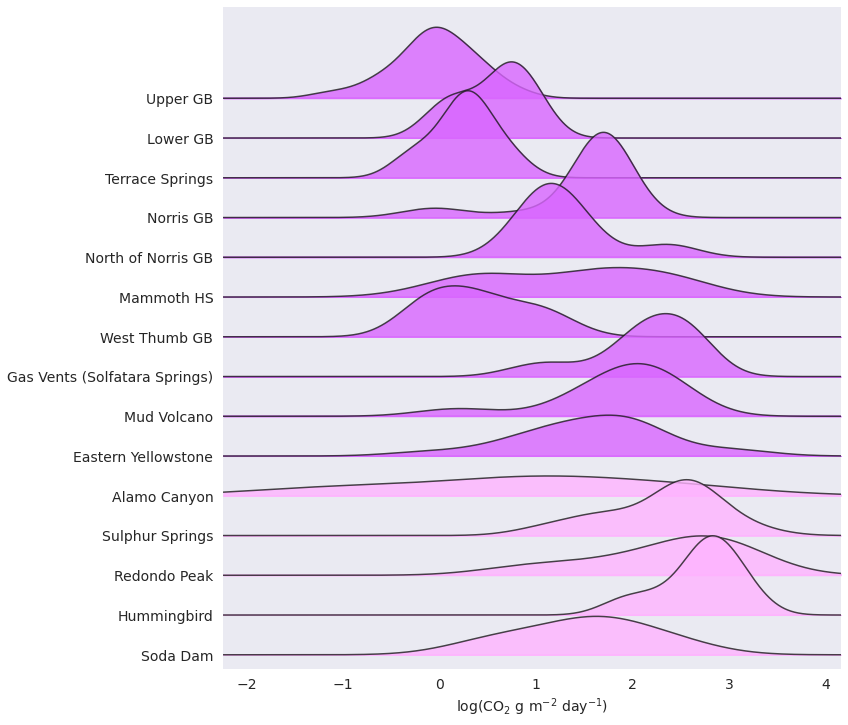

<Figure size 432x288 with 0 Axes>

In [ ]:
# Make Ridgeline Plot for Fluxes
# Order the groups from west to east
df_all["Group"] = df_all["Group"].astype("category")
df_all["Group"].cat.reorder_categories(ordered_groups_all, ordered=True,
                                       inplace=True)
## Log fluxes
df_all_log = df_all[["Group", "Location", "Soil_Classification",
                     "CH4_Flux","CO2_Flux"]]
df_all_log["CH4_Flux"] = np.log10(df_all_log["CH4_Flux"])
df_all_log["CO2_Flux"] = np.log10(df_all_log["CO2_Flux"])

## CH4
plt.figure()
joyplot(data=df_all_log[["CH4_Flux", "Group"]],
        by="Group", alpha=0.8,  
        color=[CH4_color1, CH4_color1, CH4_color1,
               CH4_color1, CH4_color1, CH4_color1,
               CH4_color1, CH4_color1, CH4_color1,
               CH4_color1, 
               CH4_color2, CH4_color2, CH4_color2,
               CH4_color2, CH4_color2],
        figsize=(12,10))
plt.xlabel("log(CH$_4$ mg m$^{-2}$ day$^{-1}$)", fontsize=14)
plt.rcParams.update({'font.size': 14})
plt.show()
plt.savefig("figures/all_CH4_flx_ridge.png", dpi=300)
## CO2
plt.figure()
joyplot(data=df_all_log[["CO2_Flux", "Group"]],
        by="Group", alpha=0.8, 
        color=[CO2_color1, CO2_color1, CO2_color1,
               CO2_color1, CO2_color1, CO2_color1,
               CO2_color1, CO2_color1, CO2_color1,
               CO2_color1,
               CO2_color2, CO2_color2, CO2_color2,
               CO2_color2, CO2_color2],
        figsize=(12,10))
plt.xlabel("log(CO$_2$ g m$^{-2}$ day$^{-1}$)", fontsize=14)
plt.rcParams.update({'font.size': 14})
plt.show()
plt.savefig("figures/all_CO2_flx_ridge.png", dpi=300)

Ridgeline plot Figure: Ridgeline plot of CH<sub>4</sub> (left) and CO<sub>2 </sub>(right) fluxes at both calderas. The groups and caldera designations follow the description in (Figure 1). Only fluxes greater than zero are shown, sites where a ridgeplot is absent indicates all measurements were below zero. Note: the scale of the x-axis for both plots is logged. 

The ridgline plots demonstrate the distribution of fluxes that are greater than zero at each site. For CH<sub>4</sub>, the fluxes exhibit broad ranges in log space, highlighting a wide range of over several orders of magnitude at several of the sites. Contrasting this generalization are sites near the western portion of YNP. Upper GB and Mammoth HS both show narrow distributions of low magnitude fluxes. Lower GB, Terrace Springs, and North of Norris fluxes show primarily non-existant distributions because all or very few measurements were greater than zero. 

However, starting at West Thumb (WTHB) and moving east through YNP, the distributions are wider and center near greater magnitudes than the other western YNP locations. The wide distribution at WTHB differs from GVNT, Mud Volcano (MDVC), and Eastern Yellowstone because it skews right indicating the densest portion of the distribution lies near lower fluxes (< 1 mg m<sup>-2</sup> day<sup>-1</sup>) but some lager fluxes can be found in the tail. The mirror image of WTHB can be found at GVNT, where the left skew shows a high number of measurements to the right of the center of the distribution. For MDVC and Eastern Yellowstone, skew is not a signficant characteristic  of the distributions as they illustrate a wide array of values of great magnitude. 

At VCNP, the distribution of CH<sub>4</sub> fluxes became narrower from the north end at Alamo Canyon (VCAC) southward toward Soda Dam (VCSD). The narrowest distribution of fluxes occured at Hummingbird (VCHB) also coincides with the highest median CH<sub>4</sub> flux measurement (137.82 mg m<sup>-2</sup> day<sup>-1</sup>, n =9) calcualted at all sites at VCNP and YNP. The narrowness of the distribution is what makes VCHB unique among VCNP measurements because Redondo Peak (VCRP, 20.06 mg m<sup>-2</sup>, n = 7) and VCSS (121.88 mg m<sup>-2</sup>, n = 17) retain similar medians. However, with narrow distribution, VCHB is believed to be a more homogeneous producer of CH<sub>4</sub>. 

CO<sub>2</sub> fluxes at YNP 

Viewing the distribution of all fluxes (both less than and greater than zero) at the individual site level (Supplementary Figure ##) on a linear scale reveals several sites with slightly bimodal distributions. For example, the distribution of CH<sub>4</sub> and CO<sub>2</sub> fluxes at MDVC shows one peak centered near zero and a second peak of a lower density centered near 15 mg CH<sub>4</sub> m<sup>-2</sup> day<sup>-1</sup> and 180 g CO<sub>2</sub> m<sup>-2</sup> day<sup>-1</sup>. These bimodal distributions underscore how many fluxes of the diffuse gases will be reported near near but there will be a smaller amount of fluxes at much greater magnitudes. 

<Figure size 432x288 with 0 Axes>

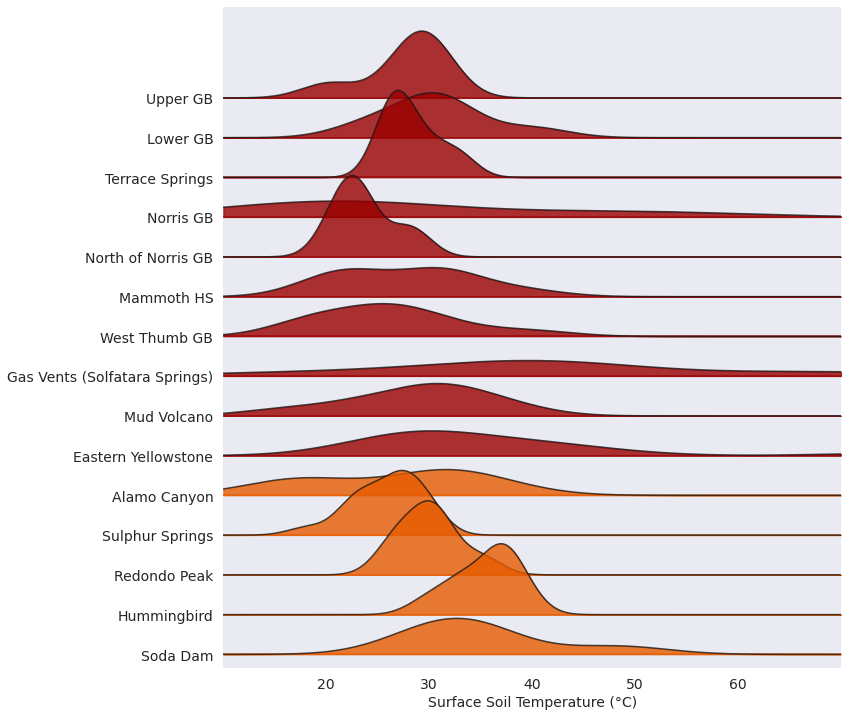

<Figure size 432x288 with 0 Axes>

In [ ]:
# Soil Tempterature Ride Line plot for Valles and Yellowstone
# CH4
plt.figure()
joyplot(data=df_all[["Soil_Tempeature_at_Surface", "Caldera", "Group"]],
        by="Group", alpha=0.8, x_range=(10,70),
        color=["#990000", "#990000", "#990000",
               "#990000", "#990000", "#990000",
               "#990000", "#990000", "#990000",
               "#990000", 
               "#e65c00", "#e65c00", "#e65c00",
               "#e65c00", "#e65c00"],
        figsize=(12,10))
plt.xlabel("Surface Soil Temperature (°C)", fontsize=14)
plt.rcParams.update({'font.size': 14})
plt.show()
plt.savefig("figures/all_soil-temp_ridge.png", dpi=300)

#### Assess the Distribution of Fluxes
With the distribution of fluxes visuzlized, is time to assess which distribution(s) are likely to represent the data. This was accomplished by using the maximum liklihood estimator (MLE) to find the appropriate parameter(s) from several distrubutions (beta, gamma, loggamma, lognormal, normal, pareto, pearson, powerlaw, and weibull). Once the parameters are estimated, the Kolmogrov-Smironov test is used to assess the goodness-of-fit that the estimated parameters to the observed data. 

In [ ]:
# Function to fit and assess parameters of distributions against observed data
def assess_fit_params(data):
  '''
  This function quantifies and ranks the best distribution to fit the input,
  data. It examines several distributions (see 'list_of_dists') and fits them to
  the data to estimate the parameters using the maximum likelihood estimate 
  (MLE) algorithm. After the parameters have been approximated, a
  Kolmogorov-Smirnov (KS) test is employed to measure which of the 
  distributions had the lowest test statistic. The user must check that the 
  p-value is appropriate as well.

  INPUT: `data` is a 1-D series or array
  OUTPUT: `df` is a 9x3 dataframe that contains results from fit and KS test
  '''
  # Import stats package from scipy
  from scipy import stats
  # Establish list of distributions to be tested against observed data
  list_of_dists = ["beta", "burr12", "chi2", "expon","fisk", "gamma",
                   "genlogistic","genpareto", "genexpon", "genextreme"
                   "invgamma", "loggamma", "lognorm", "maxwell",  "norm", 
                   "pareto","pearson3", "powerlaw", "rayleigh", "t", "vonmises",
                   "weibull_min"]
  # Establish an empty array to hold MLE parameters
  mle_param_estimates = []  
  # Loop through list of distributions to get MLE parameter estimates
  for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(data)
    a = stats.kstest(data, i, args=param)
    mle_param_estimates.append((i,a[0],a[1]))
  # Sort results by p-value
  mle_param_estimates.sort(key=lambda x:float(x[2]), reverse=True)
  # Organize results into dataframe
  df = pd.DataFrame(mle_param_estimates,
                    columns=["distribution", "statistic", "p_value"])
  # Return results
  return df

In [ ]:
# CH4
dist_fit_CH4_flx = assess_fit_params(df_YC_flx_trim["CH4_Flux"])
dist_fit_CH4_flx

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


AttributeError: ignored

In [ ]:
# CO2
## Critival Value at 0.05 Significance
crit_val = 1.35810 / np.sqrt(df_all_iso_trim.shape[0])
print("The critical value of the KS test for a sample size {} is {}".format(df_all_iso_trim.shape[0],crit_val))
## Analze potential distribution fits
dist_fit_CO2_flx = assess_fit_params(df_YC_flx_trim["CO2_Flux"])
dist_fit_CO2_flx.head()

NameError: ignored

The results show that the data for the fluxes of both gases across YNP are appropriately fitted by a lognormal distribution. A [lognormal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) is part of the exponential family of distributions 

#### Graphical Statistical Analysis of Fluxes

In [ ]:
# Install probscale package from PyPi
!pip install probscale

     |████████████████████████████████| 440kB 10.8MB/s 


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


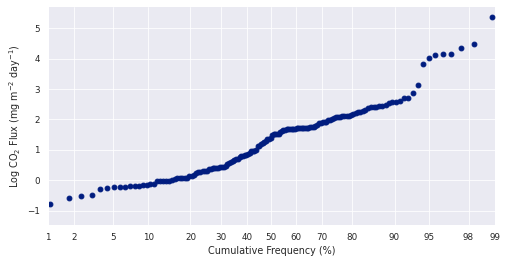

In [ ]:
# Log Flux vs Cumulative Frequency
import probscale

# Establish Figure Size
fig, ax = plt.subplots(figsize=(8,4))
# Probability Plot
probscale.probplot(np.log10(df_YC_flx_trim.CO2_Flux), ax=ax,
                   datascale="linear", probax="x")
# Pop A
'''
cum_frequency = np.arange(1, 100, step=1, dtype=int)
sns.lineplot(x=cum_frequency,
             y=(cum_frequency/0.18)*100,
             dashes=True,
             ax=ax)
'''
# Pop B
#sns.lineplot()
# Pop C
#sns.lineplot()
ax.set_xlim(left=1, right=99)
ax.set(xlabel="Cumulative Frequency (%)",
       ylabel="Log CO$_2$ Flux (mg m$^{-2}$ day$^{-1}$)")
sns.despine(fig=fig)

In [ ]:
li = ax.lines[0]
li = li.get_xydata()
df = pd.DataFrame(li, columns=["Cumulative_Freq", "Flux"])
df = df[df["Flux"] >= 0]
df.reset_index(drop=True, inplace=True)
df.head()

,Cumulative_Freq,Flux
0,15.046605,0.015612
1,15.712383,0.049732
2,16.378162,0.071571
3,17.043941,0.077138
4,17.709720,0.082713


Now, let's visualize the carbon isotopes. We will do this within the landscape of associated fluxes through a scatter plot.

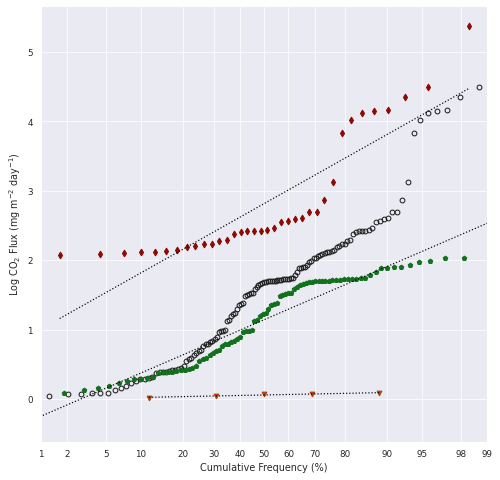

In [ ]:
df_low = df[df["Cumulative_Freq"] <= 18]
df_mod = df[(df["Cumulative_Freq"] >  18) & (df["Cumulative_Freq"] <= 75)]
df_high= df[(df["Cumulative_Freq"] >  75) & (df["Cumulative_Freq"] <= 100)]

# Establish Figure Size
fig, ax = plt.subplots(figsize=(8,8))
## Probability Plot - Main
probscale.probplot(df.Flux, ax=ax,
                   datascale="linear", probax="x",
                   bestfit=False, estimate_ci=False,
                   scatter_kws=dict(marker="o", fillstyle="none", mec="k"),
                   line_kws=dict(color="black", linestyle="dotted"))
## Probability Plot - A
probscale.probplot(df_low.Flux, ax=ax,
                   datascale="linear", probax="x",
                   bestfit=True, estimate_ci=False,
                   scatter_kws=dict(marker="v"),
                   line_kws=dict(color="black", linestyle="dotted"))
## Probability Plot - B
probscale.probplot(df_mod.Flux, ax=ax,
                   datascale="linear", probax="x",
                   bestfit=True, estimate_ci=False,
                   scatter_kws=dict(marker="p"),
                   line_kws=dict(color="black", linestyle="dotted"))
## Probability Plot - C
probscale.probplot(df_high.Flux, ax=ax,
                   datascale="linear", probax="x",
                   bestfit=True, estimate_ci=False,
                   scatter_kws=dict(marker="d"),
                   line_kws=dict(color="black", linestyle="dotted"))
ax.set_xlim(left=1, right=99)
ax.set(xlabel="Cumulative Frequency (%)",
       ylabel="Log CO$_2$ Flux (mg m$^{-2}$ day$^{-1}$)")
sns.despine(fig=fig)
plt.savefig("figures/GSA_CO2_Flux.png", dpi=300)

Figure ##: Flux partitioning of CO<sub>2</sub> gases across YNP using graphical statistical analysis (GSA), also called "probability plot", methods described originally by Sinclair (1974) and adapted by Chiodini et al. (1998) and later by Wen et al. (2016). Here the fluxes measured across the park using the CRDS-AC equipment shows there are roughly three populations of measurements: low (i.e., sinter capped), moderate (i.e., fractured sinter and porous soil), and high (i.e., “sinter-less”, highly porous soil).  


In [ ]:
# Descriptive Stats for each flux popoulation
print(np.power(10, df_low["Flux"]).describe())
print(np.power(10, df_mod["Flux"].describe()))
print(np.power(10, df_high["Flux"].describe()))

count      25.000000
mean      461.286908
std       315.500495
min        75.739422
25%       156.536421
50%       489.595421
75%       617.223211
max      1050.275764
Name: Flux, dtype: float64
count    1.000000e+81
mean     1.227966e+04
std      3.815966e+00
min      1.051731e+03
25%      3.583799e+03
50%      1.145646e+04
75%      4.842366e+04
max      9.022860e+04
Name: Flux, dtype: float64
count    1.000000e+30
mean     1.680408e+05
std      1.495472e+00
min      9.448964e+04
25%      1.217358e+05
50%      1.659463e+05
75%      2.002679e+05
max      4.228520e+05
Name: Flux, dtype: float64


The GSA partitions the fluxes measured across YNP into three different populations as described in Figure ##. The low flux (sinter capped) areas show that the minimum value of fluxes in this area are 1 and 3 orders of magnitude less than the moderate (fractured sinter and porous soil) and high (sinter-free highly porous soil) areas, respectively. Furthermore, the mean values of the low, moderate, and high flux areas are 461 ± 316, 12280 ± 38, and 168089 ± 15 mg CO<sub>2</sub> m<sup>-2</sup> day<sup>-1</sup>. There also appears to be a celing  or a maximum value of approximately 50000 mg CO<sub>2</sub> m<sup>-2</sup> day<sup>-1</sup> present in the moderate flux population suggesting that there is possibly increased advection or another mechanism that aids the increased fluxes observed within the high flux population.

### Hypothesis Tests Across Groups

Having visualized the fluxes and δ<sup>13</sup>C compositions, it is time to quantify the differences between groups using frequentist methods. An analysis of variance will allow us to compare the means of the fluxes in the groups (site and thermal geochemistry). 

Using the information gleaned from quantifying the mean and standard deviation of the fluxes it is possible that one or both gases are displaying non-normal behavior. To test this, we employ Kolmogorov-Smirnov (KS) test for normality.

In [ ]:
# Import KS test from statsmodels
from statsmodels.stats.diagnostic import kstest_normal

## CH4
# Deploy a KS test for normality
ksstest, pvalue = kstest_normal(df_all_iso_trim.CH4_Flux)
# Print result
print("The p-value for the CH4 fluxes of the KS test was {}".format(pvalue))

## CO2
# Deploy a KS test for normality
ksstest, pvalue = kstest_normal(df_all_iso_trim.CO2_Flux)
# Print result
print("The p-value for the CO2 fluxes of the KS test was {}".format(pvalue))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The p-value for the CH4 fluxes of the KS test was 3.062479973175797e-28
The p-value for the CO2 fluxes of the KS test was 6.834918344723726e-19


The KS test for the CH<sub>4</sub> and CO<sub>2</sub> fluxes shows that these meterics **do not** represent normally distributed data. Therfore, to analyze the significant differences between groups, a non-parametric model will need to be used. In this case, a [Kruskal-Wallis](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance) (KW) test will be appropriate. The KW test will analyze the different groups (sites) as they have been presented above to see if at least one group is significantly different than the others. If so, post-hoc tests will be conducted to see which group(s) are significantly different. 

In [ ]:
# Conduct the KW test
import scipy.stats as spstat

## CH4
# Split the dataframe up by the groups (i.e., site)
gb = df_all_iso_trim.groupby('Group')    
gb = [gb.get_group(x) for x in gb.groups]

KW, pvalue = spstat.kruskal(gb[0].CH4_Flux, gb[1].CH4_Flux, gb[2].CH4_Flux, 
                            gb[3].CH4_Flux, gb[4].CH4_Flux, gb[5].CH4_Flux,
                            gb[6].CH4_Flux, gb[7].CH4_Flux, gb[8].CH4_Flux,
                            gb[9].CH4_Flux)
print("The pvalue for the Kruskal-Wallis test for CH4 fluxes is: {}".format(pvalue))

## CO2
# Split the dataframe up by the groups (i.e., site)
bg = df_all_iso_trim.groupby('Group')    
bg = [bg.get_group(x) for x in bg.groups]

KW, pvalue = spstat.kruskal(bg[0].CO2_Flux, bg[1].CO2_Flux, bg[2].CO2_Flux, 
                            bg[3].CO2_Flux, bg[4].CO2_Flux, bg[5].CO2_Flux,
                            bg[6].CO2_Flux, bg[7].CO2_Flux, bg[8].CO2_Flux,
                            bg[9].CO2_Flux)
print("The pvalue for the Kruskal-Wallis test for CO2 fluxes is: {}".format(pvalue))

The pvalue for the Kruskal-Wallis test for CH4 fluxes is: 9.470108712434069e-05
The pvalue for the Kruskal-Wallis test for CO2 fluxes is: 2.64667139928577e-07


As anticipated, the KW test rejected the null hypothesis for CH<sub>4</sub> fluxes was rejected (p-value ≤ 0.0001), and the null for CO<sub>2</sub> was also rejected (p-value ≤ 0.0001). 

Since both of these gases have at least one significantly different group among them, the next step is to conduct post-hoc analysis. There are two reasonable methods to conduct this analsysis: 1) [Dunn's](https://www.statology.org/dunns-test/) test and 2) [Conover-Imam](https://permalink.lanl.gov/object/tr?what=info:lanl-repo/lareport/LA-07677-MS) test. To leverage the [greatest statistical power](https://stackoverflow.com/questions/31434166/which-post-hoc-test-should-i-conduct-after-doing-a-kruskal-wallis) in assessing the different groups, the Conover-Imam test is the best option. 

In [ ]:
# Install package for variation test
!pip install scikit-posthocs

In [ ]:
# Assess the significant differences between groups
# Import the test
from scikit_posthocs import posthoc_conover as conover

## Apply the test to the datasets
pval_conover = conover([gb[0].CH4_Flux, gb[1].CH4_Flux, gb[2].CH4_Flux,
                        gb[3].CH4_Flux, gb[4].CH4_Flux, gb[5].CH4_Flux,
                        gb[6].CH4_Flux, gb[7].CH4_Flux, gb[8].CH4_Flux,
                        gb[9].CH4_Flux],
                       p_adjust="bonferroni")
# Names for Conover-Imam test results
names = ["North of Norris GB", "Mammoth HS", "Gas Vents (Solfatara Springs)",
         "Terrace Springs", "Eastern Yellowstone", "Mud Volcano", "Lower GB",
         "West Thumb GB", "Upper GB", "Norris GB"]
## Change the column and index names
pval_conover.columns = names
pval_conover.index = names
# Show the results
pval_conover

,North of Norris GB,Mammoth HS,Gas Vents (Solfatara Springs),Terrace Springs,Eastern Yellowstone,Mud Volcano,Lower GB,West Thumb GB,Upper GB,Norris GB
North of Norris GB,1.000000,0.186376,1.000000,0.847995,1.000000,0.015205,1.0,1.00000,1.000000,1.000000
Mammoth HS,0.186376,1.000000,0.012557,0.000782,0.350478,1.000000,1.0,1.00000,0.234924,0.676202
Gas Vents (Solfatara Springs),1.000000,0.012557,1.000000,1.000000,1.000000,0.001259,1.0,1.00000,1.000000,1.000000
Terrace Springs,0.847995,0.000782,1.000000,1.000000,1.000000,0.000061,1.0,1.00000,1.000000,1.000000
Eastern Yellowstone,1.000000,0.350478,1.000000,1.000000,1.000000,0.061749,1.0,1.00000,1.000000,1.000000
Mud Volcano,0.015205,1.000000,0.001259,0.000061,0.061749,1.000000,1.0,0.67298,0.025626,0.155115
Lower GB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.00000,1.000000,1.000000
West Thumb GB,1.000000,1.000000,1.000000,1.000000,1.000000,0.672980,1.0,1.00000,1.000000,1.000000
Upper GB,1.000000,0.234924,1.000000,1.000000,1.000000,0.025626,1.0,1.00000,1.000000,1.000000
Norris GB,1.000000,0.676202,1.000000,1.000000,1.000000,0.155115,1.0,1.00000,1.000000,1.000000


#### Significance Heatmap for CH<sub>4</sub> Fluxes
Figure ##: Heatmap that presents the results of a Conover-Imam test to examine the differences in CH<sub>4</sub> fluxes across the Yellowstone caldera. Dark colors indicate significance, where light colors show a lack of significance. Values within the squares reprsent the corresponding $p$-values. Values with "0.00" represent $p$ < 0.005.

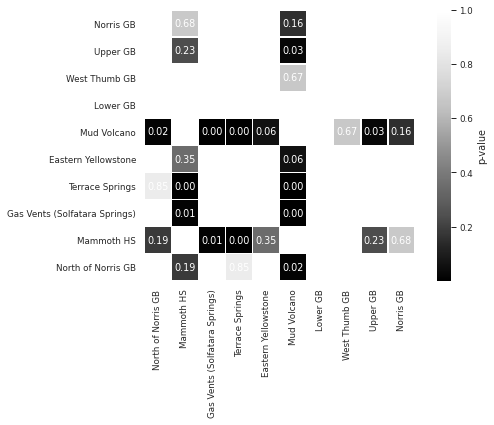

In [ ]:
# Create heatmap
plt.figure(figsize=(8,6))
ax = sns.heatmap(pval_conover, linewidths=0.35, cmap="Greys_r",
                 square=True, fmt=".2f",
                 annot=True, annot_kws={"color":"white", "weight":"bold"},
                 cbar_kws={"label":"p-value"}) 
ax.invert_yaxis()
plt.tight_layout()
plt.savefig("figures/CH4_flx_CI_tst.png", dpi=300)

After applying the Conover-Imam test for signifance ($\alpha = 0.05$) between the median fluxes at each sit, the results show that the CH<sub>4</sub> fluxes at Mud Volcano is signficantly different than one of the other two remianing acid-sulphate regions (Gas Vents; $p$ ≤ 0.01). The other acid sulphate region, Eastern Yellowstone was not significantly different than Mud Volcano ($p$ = 0.06) but it must be stated there are many arguments that diminish the importance of the precisce cutoff of $p$ = 0.05 (add citations). 

Between the two travertine settings, Mammoth Hot Springs and Terrace Springs, there was a signifact difference between the CH<sub>4</sub> fluxes.

Among the neutral-chloride locations, none of the sites within the category were significantly different.

In [ ]:
## CO2
## Apply the Conover-Imam test to the datasets
pval_conover_CO2 = conover([bg[0].CO2_Flux, bg[1].CO2_Flux, bg[2].CO2_Flux,
                            bg[3].CO2_Flux, bg[4].CO2_Flux, bg[5].CO2_Flux,
                            bg[6].CO2_Flux, bg[7].CO2_Flux, bg[8].CO2_Flux,
                            bg[9].CO2_Flux],
                           p_adjust="bonferroni")
# Names for Conover-Imam test results
names = ["North of Norris GB", "Mammoth HS", "Gas Vents (Solfatara Springs)",
         "Terrace Springs", "Eastern Yellowstone", "Mud Volcano", "Lower GB",
         "West Thumb GB", "Upper GB", "Norris GB"]
## Change the column and index names
pval_conover_CO2.columns = names
pval_conover_CO2.index = names
# Show the results
pval_conover_CO2

,North of Norris GB,Mammoth HS,Gas Vents (Solfatara Springs),Terrace Springs,Eastern Yellowstone,Mud Volcano,Lower GB,West Thumb GB,Upper GB,Norris GB
North of Norris GB,1.000000,0.000113,1.000000,1.000000,0.000288,0.004703,1.0,1.000000,1.000000,1.000000
Mammoth HS,0.000113,1.000000,0.000238,0.574989,1.000000,1.000000,1.0,0.000060,0.000001,0.000498
Gas Vents (Solfatara Springs),1.000000,0.000238,1.000000,1.000000,0.000417,0.006769,1.0,1.000000,1.000000,1.000000
Terrace Springs,1.000000,0.574989,1.000000,1.000000,0.617668,1.000000,1.0,0.548901,0.391825,1.000000
Eastern Yellowstone,0.000288,1.000000,0.000417,0.617668,1.000000,1.000000,1.0,0.000099,0.000004,0.000835
Mud Volcano,0.004703,1.000000,0.006769,1.000000,1.000000,1.000000,1.0,0.001404,0.000033,0.013909
Lower GB,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
West Thumb GB,1.000000,0.000060,1.000000,0.548901,0.000099,0.001404,1.0,1.000000,1.000000,1.000000
Upper GB,1.000000,0.000001,1.000000,0.391825,0.000004,0.000033,1.0,1.000000,1.000000,1.000000
Norris GB,1.000000,0.000498,1.000000,1.000000,0.000835,0.013909,1.0,1.000000,1.000000,1.000000


#### Significance Heatmap for CO<sub>2</sub> Fluxes
Figure ##: Heatmap that presents the results of a Conover-Imam test to examine the differences in CO<sub>2</sub> fluxes across the Yellowstone caldera. Dark colors indicate significance, where light colors show a lack of significance. Values within the squares reprsent the corresponding $p$-values. Values with "0.00" represent $p$ < 0.005.

### EGM Fluxes
In addition to making flux measurements with the CRDS-AC, CO<sub>2</sub> fluxes were measured using an [EGM-5](https://ppsystems.com/egm-5/). The EGM is a portable accumulation chamber (PAC, as named in Ajayi & Ayers, 2021). Instead of measuring CH4 and carbon isotopes, the EGM only measures CO2 and produces a rapid and reliable flux estimate using a linear model, which is similar to what is for the CRDS-AC measurements.

Due to the portability of EGM versus the lack of mobility for the CRDS-AC, EGM measurements were made in full and half reactangular grids surrounding the CRDS-AC measurements. For example, consider a Cartesian coordinate system, where the CRDS-AC measurement at a location was made at the origin. EGM measurements would be made at (-1,0), (-1,1), (0,1), (1,0), (1,1), (1,-1), (0,-1), and (-1,-1). The actual distance between the CRDS-AC and the EGM ranged between 1.2 and 2.6 m. In some cases, all of the above measurements were not possible due to time or a suitable surface (e.g. non-rocky, no standing liquid, large thermal feature), but a subset of measurements was made at most measuring sites beginning with the 2018 campaign in Yellowstone.  

In this section of the notebook, the EGM fluxes are compared to the CRDS-AC fluxes. The objective of this exercise is to demonstrate how close the CO<sub>2</sub> fluxes collected by the EGM are to the fluxes estimated by the CRDS-AC. Where the differences are large, one can infer that heterogeneity is high, and conversely, when differences are small, homogenity (at least at the scale of meters) is a likely explanation.

In [ ]:
# Import YNP EGM Data
## Manual File Upload from local drive
uploaded = files.upload()

Saving EGM_CO2FluxesAllData.csv to EGM_CO2FluxesAllData (6).csv


In [ ]:
# Import file into workspace
df_EGM_YC = pd.read_csv(io.BytesIO(uploaded['EGM_CO2FluxesAllData.csv']),
                         header=0, parse_dates=True)

# Convert fluxes from g CO2 m-2 hr-1 to g CO2 m-2 day-1
df_EGM_YC["fCO2"] = df_EGM_YC["fCO2"] * 24

In [ ]:
# Import VCNP EGM Data
## Manual File Upload from local drive
uploaded = files.upload()

Saving VCNP_EGMCO2Fluxes_AllData.csv to VCNP_EGMCO2Fluxes_AllData (3).csv


In [ ]:
# Import file into workspace
df_EGM_VC = pd.read_csv(io.BytesIO(uploaded['VCNP_EGMCO2Fluxes_AllData.csv']),
                         header=0, parse_dates=True)

# Convert fluxes from g CO2 m-2 hr-1 to g CO2 m-2 day-1
df_EGM_VC["fCO2"] = df_EGM_VC["fCO2"] * 24

In [ ]:
# Merge data from both calderas together
df_EGM_all = pd.concat([df_EGM_YC, df_EGM_VC], ignore_index=True)
# Change "Date" fromb -object- to -datetime64-
df_EGM_all["Date"] = df_EGM_all["Date"].astype("datetime64")
# Sort by date
df_EGM_all.sort_values(by=["Date"], ascending=True, ignore_index=True,
                       inplace=True)
# Check data types
df_EGM_all.head()

,Date,Year,Location,EGM_Location,Site,Site_Number,Site_Letter,fCO2,log10fCO2,Latitude,Longitude
0,2018-06-23,2018,GBSN_23Jun2018_1.4,GBSN_1.4_F,GBSN,1.4,F,6.96,-0.537602,44.94777,-110.845643
1,2018-06-23,2018,GBSN_23Jun2018_1.4,GBSN_1.4_A,GBSN,1.4,A,1.20,-1.301030,44.94783,-110.845643
2,2018-06-23,2018,GBSN_23Jun2018_1.4,GBSN_1.4_B,GBSN,1.4,B,2.88,-0.920819,44.94783,-110.845600
3,2018-06-23,2018,GBSN_23Jun2018_1.4,GBSN_1.4_C,GBSN,1.4,C,0.72,-1.522879,44.94783,-110.845557
4,2018-06-23,2018,GBSN_23Jun2018_1.4,GBSN_1.4_D,GBSN,1.4,D,2.40,-1.000000,44.94780,-110.845643


In [ ]:
# Group data by "Location" so that the EGM data will match up with the CRDS-AC 
# data. Calculate the median and standard deviation flux by this grouping
df_EGM_all_grp = df_EGM_all.groupby(by=["Location"])[["fCO2", "log10fCO2"]]\
.agg([np.mean, np.std, np.count_nonzero])
# Reset index so that "Location" is a column instead of an index
df_EGM_all_grp.reset_index(inplace=True)
# Prview dataframe
df_EGM_all_grp.head()

Location      fCO2            ... log10fCO2                        
                             mean       std  ...      mean       std count_nonzero
0    CLPD_27Jun2018_1.1  4.380000  2.318916  ... -0.786102  0.213492           8.0
1    CLPD_27Jun2018_1.2  7.097143  5.788027  ... -0.722819  0.523364           7.0
2    CLPD_27Jun2018_1.3  1.230000  2.982291  ... -1.092038  0.445421           8.0
3  CLPD_27Jun2018_1.4.1  6.870000  3.644158  ... -0.595424  0.226499           8.0
4    CSTL_02Jul2018_1.1  1.152000  0.888324  ... -1.261439  0.215898           5.0

[5 rows x 7 columns]

In [ ]:
# Create df for grouped CO2 fluxes
dfx = df_EGM_all_grp[["Location", "fCO2"]]
## Continue the process by only retaining the mean and std of the grouped fluxes
dfx["fCO2_mean"] = dfx[("fCO2", "mean")]
dfx["fCO2_std"] = dfx[("fCO2", "std")]
dfx["fCO2_count"] = dfx[("fCO2", "count_nonzero")]
### Drop the multi-indexed "fCO2" column
dfx.drop("fCO2", axis=1, inplace=True)
dfx.columns = dfx.columns.droplevel(1)
# Change datatype for "fCO2_count" to -int-
dfx["fCO2_count"] = dfx["fCO2_count"].astype(int)
# Gather relevant data from the complete dataframe
dfy = df_all[["Location", "Soil_Classification", "Group", "CO2_Flux", 
              "LowerBound_CO2_Flux", "UpperBound_CO2_Flux"]]

# Join EGM and CRDS-AC CO2 data on location for comparative analysis
df_xy = dfx.merge(dfy, how="inner", on="Location")

# Compare fCO2_mean to CO2_flux by making a new column "EGM_AC_diff" see handwritten notebook for visualizations
df_xy["AC_EGM_diff"] = df_xy.CO2_Flux - df_xy.fCO2_mean
# Preview dataframe
df_xy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Location,fCO2_mean,fCO2_std,fCO2_count,Soil_Classification,Group,CO2_Flux,LowerBound_CO2_Flux,UpperBound_CO2_Flux,AC_EGM_diff
0,CLPD_27Jun2018_1.1,4.380000,2.318916,8,Neutral-Chloride,Lower GB,4.637912,4.358375,4.917449,0.257912
1,CLPD_27Jun2018_1.2,7.097143,5.788027,7,Neutral-Chloride,Lower GB,1.848310,1.829182,1.867439,-5.248832
2,CLPD_27Jun2018_1.3,1.230000,2.982291,6,Neutral-Chloride,Lower GB,0.922803,0.892978,0.952628,-0.307197
3,CLPD_27Jun2018_1.4.1,6.870000,3.644158,8,Neutral-Chloride,Lower GB,9.520220,8.906782,10.133657,2.650220
4,CSTL_02Jul2018_1.1,1.152000,0.888324,4,Neutral-Chloride,Upper GB,0.583687,0.555587,0.611786,-0.568313


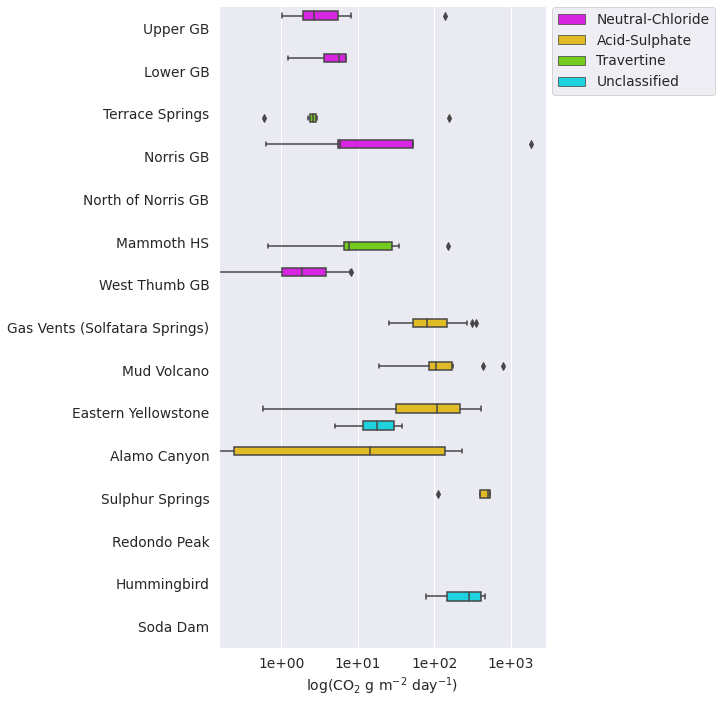

In [ ]:
## CO2 - Yellowstone
p_CO2_flx = sns.catplot(x="fCO2_mean", y="Group", data=df_xy, kind="box",
                        hue="Soil_Classification", orient="h", 
                        height=10, aspect=1.03,
                        legend_out=False, palette="gist_ncar_r")
p_CO2_flx.set_axis_labels("log(CO$_2$ g m$^{-2}$ day$^{-1}$)", "",
                          fontsize=14)
p_CO2_flx.set(xscale="log")
for ax in p_CO2_flx.axes.flat:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:2.0e}'))
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
# Save plot to Google Drive Directory  
plt.savefig("figures/EGM_CO2_flx_all_box.png", dpi=300)

Boxplot for EGM Data: Boxplots of CO<sub>2</sub> fluxes collected using the EGM-5 chamber. Each boxplot is colored by the soil classification. Note the logged x-axis and there are two box plots (acid-sulphate and unclassified) for the Eastern Yellowstone site. Rows without boxplots indicate that no EGM measurements were collected at that site.

Visualize the differences between average EGM CO2 flux and the CRDS-AC

In [ ]:
x = df_xy[(df_xy["CO2_Flux"] > 0) & (df_xy["fCO2_mean"] > 0)]
df_xy_trim = df_xy.loc[x.index]

Using only fluxes that are greater than zero, the EGM CO<sub>2</sub> fluxes are examined against the CRDS-AC Fluxes.

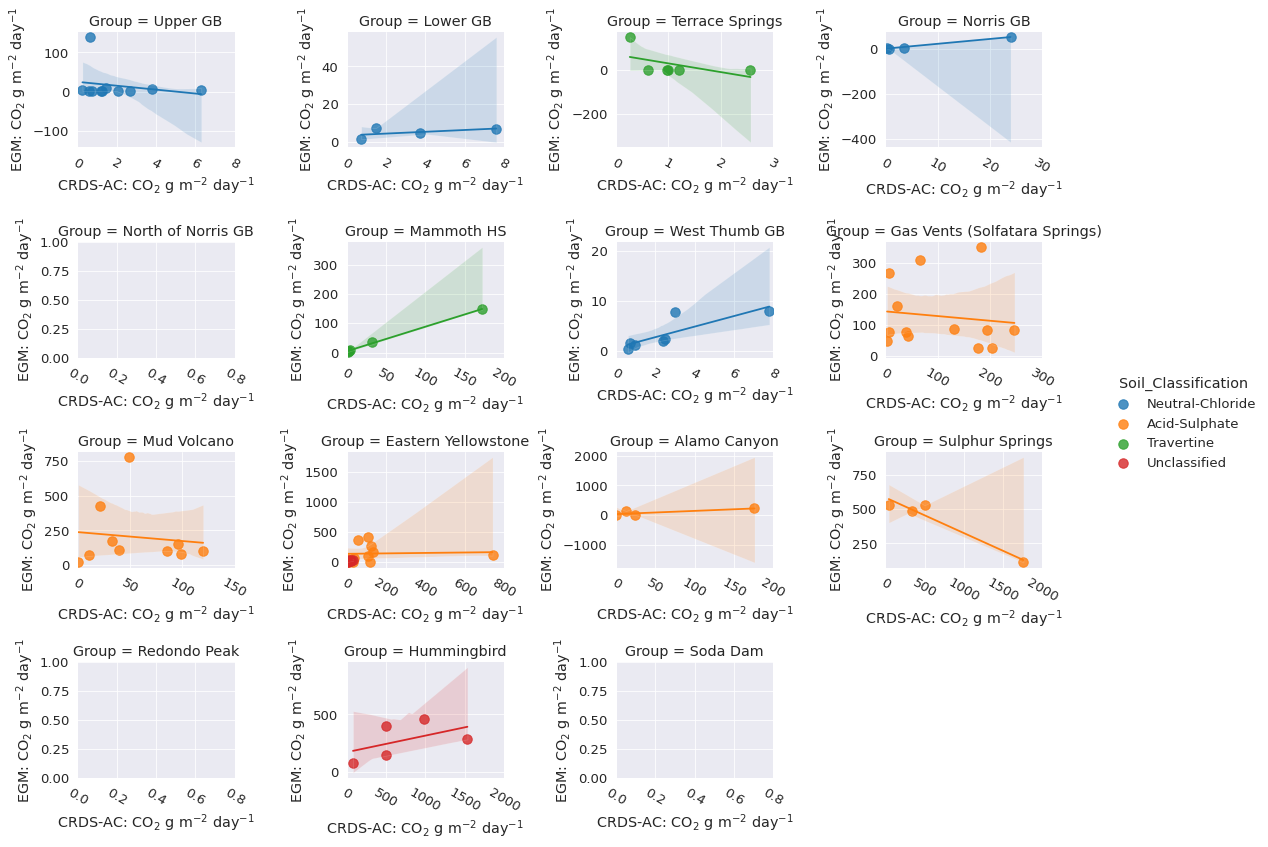

In [ ]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

def refline_fg(data, **kws):
  ax = plt.gca()
  line = mlines.Line2D([0,1], [0,1], color="black")
  transform = ax.transAxes
  line.set_transform(transform)
  ax.add_line(line)
  ax.set_xlim(0,None)
  ax.set_ylim(0,None)


# Visualize the differences
## Avg EGM CO2 vs CRDS-AC measurements
fg = sns.FacetGrid(df_xy_trim,
                   hue="Soil_Classification",
                   col="Group", col_wrap=4, 
                   height=3, aspect=1.3,
                   sharex=False, sharey=False)
fg.map_dataframe(sns.regplot, x="CO2_Flux", y="fCO2_mean",
                 scatter_kws={"s":90})
#fg.map_dataframe(refline_fg)
fg.set(xlabel="CRDS-AC: CO$_2$ g m$^{-2}$ day$^{-1}$",
       ylabel="EGM: CO$_2$ g m$^{-2}$ day$^{-1}$")
plt.rcParams.update({'font.size': 18})
fg.set_xticklabels(rotation=-30)
fg.add_legend()
fg.tight_layout()
plt.savefig("figures/all_EGM_CO2_flx_v_Picarro_CO2_flx.png", dpi=300)

Figure ##: EGM CO<sub>2</sub> fluxes are compared aginst CRDS-AC CO<sub>2</sub>  fluxes. Each scatter plot represents a different group, and the data has been seprarted by soil classification with color. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def grp_regress(df, yvar, xvars):
  # Separate the dependent variable from the rest of the data
  Y = df[[yvar]]
  # Separate the independent variable(s) from the rest of the data
  X = df[[xvars]]
  # Establish the intercept
  LR = LinearRegression()
  # Fit the linear regression to the data
  LR.fit(X,Y)
  # Get predictions based on 
  Y_pred = LR.predict(X)
  return Y_pred, LR.coef_, r2_score(Y, Y_pred)

In [ ]:
df = df_xy["Group"]

# Hard-coding the drop for now, should be made dynamic 
df = df[df["Group"] != "Redondo Peak"]
df = df[df["Group"] != "Soda Dam"]

a,b,c = grp_regress(df, "fCO2_mean", "CO2_Flux")
print(b)

[[0.15878383]]


[[0.18571711]]


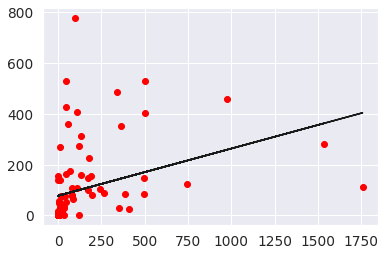

In [ ]:
Y = df_xy_trim[["fCO2_mean"]]
X = df_xy_trim[["CO2_Flux"]]
#X = sm.add_constant(X)
regressor = LinearRegression()

regressor.fit(X,Y)
print(regressor.coef_)
ypred = regressor.predict(X)

plt.scatter(X, Y, color="red")
plt.plot(X, ypred, color="k")
plt.show()

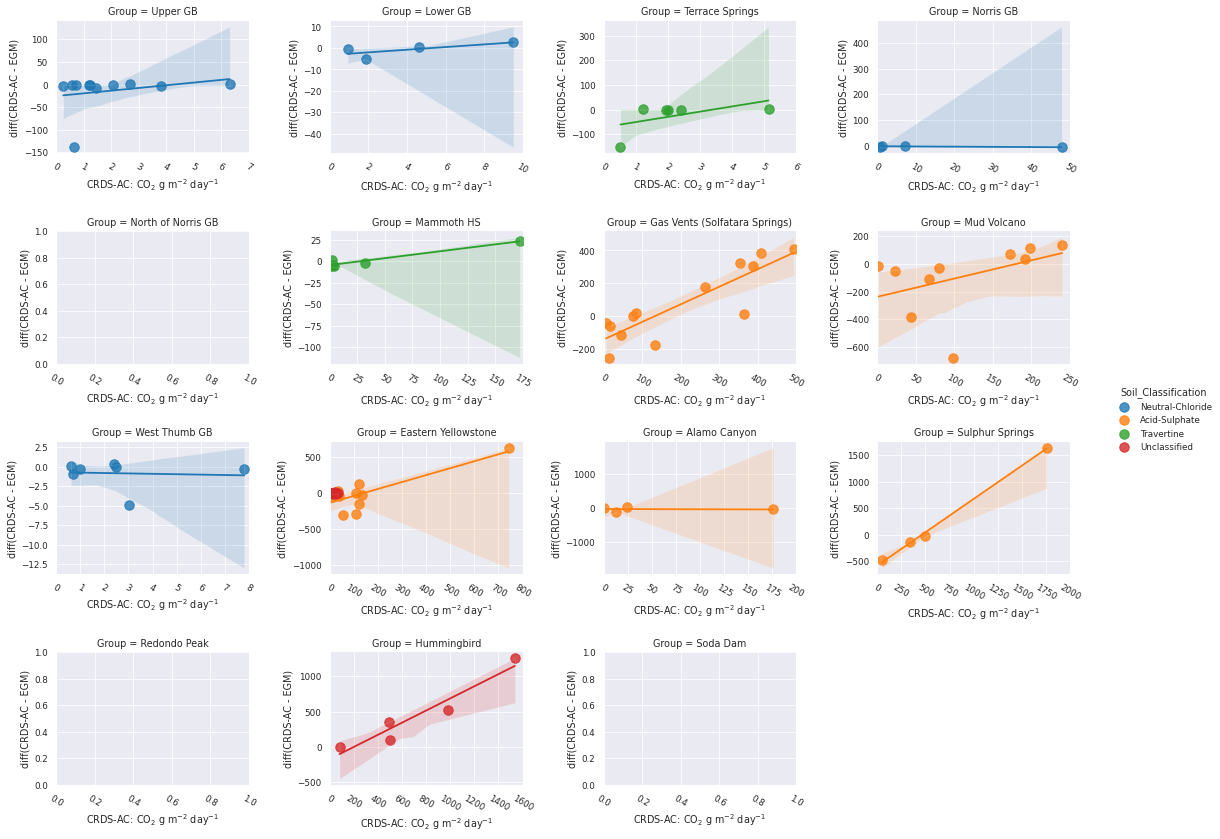

In [ ]:
def refline_fg_free(data, **kws):
  ax = plt.gca()
  line = mlines.Line2D([0,1], [0,1], color="black")
  transform = ax.transAxes
  line.set_transform(transform)
  ax.add_line(line)
  ax.set_xlim(None,None)
  ax.set_ylim(None,None)

## Avg diff(CRDS-AC - EGM CO2) vs CRDS-AC measurements
fg = sns.FacetGrid(df_xy_trim,
                   hue="Soil_Classification",
                   col="Group", col_wrap=4, 
                   height=3,aspect=1.3,
                   sharex=False, sharey=False)
fg.map_dataframe(sns.regplot, x="CO2_Flux", y="AC_EGM_diff",
                 scatter_kws={"s":90})
#fg.map_dataframe(refline_fg_free)
fg.set(xlabel="CRDS-AC: CO$_2$ g m$^{-2}$ day$^{-1}$",
       ylabel="diff(CRDS-AC - EGM)")
plt.rcParams.update({'font.size': 18})
fg.set_xticklabels(rotation=-30)
fg.set(xlim=(None,None), ylim=(None,None))
fg.add_legend()
fg.tight_layout()
plt.savefig("figures/all_diff_AC-EGM_CO2_flx_v_Picarro_CO2_flx.png", dpi=300)

## δ<sup>13</sup>C Summary

### Partitioning Isotopes 
To build on the partitioning of fluxes, isotopes can be incorporated into the GSA to further delineate populations (Chiodini et al., (2008) and negate the arbitrary selection fo inflection points (Smith, 2016; Wen et al. (2016)).

#### Visualize the Distribution of Carbon Isotopes
Similar to Chiodini et al., (2008), the carbon isotopes are plotted against the magnitude of the fluxes. Following this presentation, the isotopes are visualized a density plot to ascertain the shape of their distribution. Using similar tests as with the examination of the fluxes, the best fit for the observed data will be applied to the isotopes. 



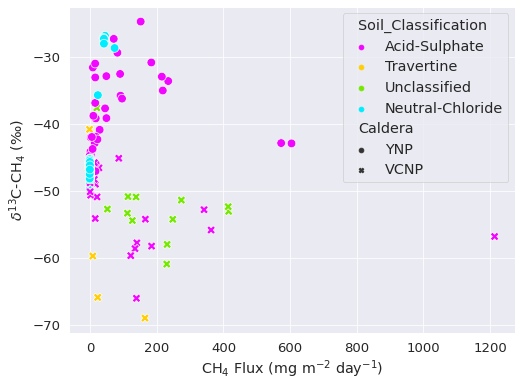

<Figure size 432x288 with 0 Axes>

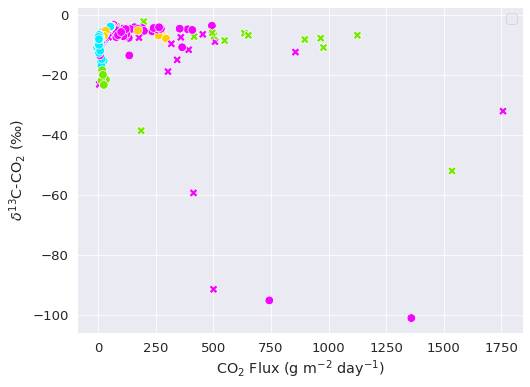

<Figure size 432x288 with 0 Axes>

In [ ]:
# Scatter plot for d13C vs Fluxes
markers = {"YNP":"o", "VCNP":"X"}
## CH4
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x="CH4_Flux", y="d13CH4_source", data=df_all, s=75,
                     hue="Soil_Classification", palette="gist_ncar_r",
                     style="Caldera", markers=markers)
ax.set(xlabel="CH$_4$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CH$_4$ (‰)")
plt.show()
plt.savefig("figures/CH4_d13_flx_all.png", dpi=300)
## CO2
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x="CO2_Flux", y="d13CO2_source", data=df_all, s=75,
                     hue="Soil_Classification", palette="gist_ncar_r",
                     style="Caldera", markers=markers)
ax.set(xlabel="CO$_2$ Flux (g m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CO$_2$ (‰)")
ax.legend("")
plt.show()
plt.savefig("figures/CO2_d13_flx_all.png", dpi=300)

In [ ]:
# Create trimmed dataframe (use isotopes to trim)
df_all_iso_trim = df_all[(df_all["d13CH4_source"] <= 0) &
                            (df_all["d13CH4_source"] >= -100) &
                            (df_all["d13CO2_source"] <= 0) &
                            (df_all["d13CO2_source"] >= -30)]
# Quantify the error for the isotopes  
df_all_iso_trim["d13CH4_err"] = df_all_iso_trim.d13CH4_UpperBound_source - df_all_iso_trim.d13CH4_LowerBound_source
df_all_iso_trim["d13CO2_err"] = df_all_iso_trim.d13CO2_UpperBound_source - df_all_iso_trim.d13CO2_LowerBound_source                               
df_all_iso_trim.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Total_Chamber_Enclosure,Start_Time_Flux,End_Time_Flux,CH4_Flux,LowerBound_CH4_Flux,UpperBound_CH4_Flux,KP_d13CH4_source,KP_LowerBound_d13CH4_source,KP_UpperBound_d13CH4_source,d13CH4_source,d13CH4_LowerBound_source,d13CH4_UpperBound_source,CO2_Flux,LowerBound_CO2_Flux,UpperBound_CO2_Flux,KP_d13CO2_source,KP_LowerBound_d13CO2_source,KP_UpperBound_d13CO2_source,d13CO2_source,d13CO2_LowerBound_source,d13CO2_UpperBound_source,Soil_Tempeature_at_Surface,Caldera,d13CH4_err,d13CO2_err
0,Sulphur Springs,Sulphur Springs,VCSS_08Jul2017_1.1,Acid-Sulphate,35.907929,-106.615888,2017-07-08,2017-07-08 12:14:37,2017-07-08 12:24:59,10.366667,2017-07-08 12:15:27,2017-07-08 12:18:34,3.357773,1.649116,5.066431,-50.205886,-52.982369,-47.429403,-48.730193,-50.506002,-46.954383,51.112515,44.544118,57.680912,-0.971325,-1.282136,-0.660515,-4.815441,-5.164223,-4.466659,22.4,VCNP,3.551619,0.697563
1,Sulphur Springs,Sulphur Springs,VCSS_08Jul2017_1.2,Acid-Sulphate,35.907838,-106.615947,2017-07-08,2017-07-08 12:57:24,2017-07-08 13:00:37,3.216667,2017-07-08 12:58:14,2017-07-08 13:00:37,16.194417,15.870936,16.517899,-56.296871,-66.910501,-45.683241,-49.010269,-51.273798,-46.746740,264.970168,259.503326,270.437010,-3.372632,-3.799772,-2.945493,-6.122984,-6.414749,-5.831219,22.5,VCNP,4.527058,0.583530
2,Sulphur Springs,Sulphur Springs,VCSS_08Jul2017_1.3,Acid-Sulphate,35.907716,-106.615991,2017-07-08,2017-07-08 13:47:18,2017-07-08 14:07:45,20.450000,2017-07-08 13:48:07,2017-07-08 13:51:15,2.512187,2.330737,2.693636,-69.533065,-73.673506,-65.392624,-50.607092,-52.629645,-48.584538,24.166726,23.204008,25.129444,-7.868025,-7.995603,-7.740447,-8.355437,-8.730671,-7.980202,23.4,VCNP,4.045108,0.750469
3,Sulphur Springs,Sulphur Springs,VCSS_10Jul2017_1.4,Acid-Sulphate,35.907632,-106.616073,2017-07-10,2017-07-10 11:04:39,2017-07-10 11:24:55,20.266667,2017-07-10 11:05:29,2017-07-10 11:08:38,1.510209,1.462587,1.557831,-86.225751,-91.247157,-81.204346,-50.649326,-52.548033,-48.750619,11.099011,11.028675,11.169347,-13.180241,-13.800998,-12.559483,-10.078260,-10.449797,-9.706724,22.4,VCNP,3.797414,0.743074
4,Sulphur Springs,Sulphur Springs,VCSS_10Jul2017_1.5,Acid-Sulphate,35.907598,-106.616118,2017-07-10,2017-07-10 11:55:26,2017-07-10 12:02:21,6.916667,2017-07-10 11:56:16,2017-07-10 11:59:22,20.803738,20.491237,21.116239,-58.063013,-61.208880,-54.917146,-50.912638,-53.102726,-48.722550,147.393588,144.862526,149.924650,-3.178951,-3.359028,-2.998874,-4.348764,-4.692456,-4.005072,24.7,VCNP,4.380176,0.687384


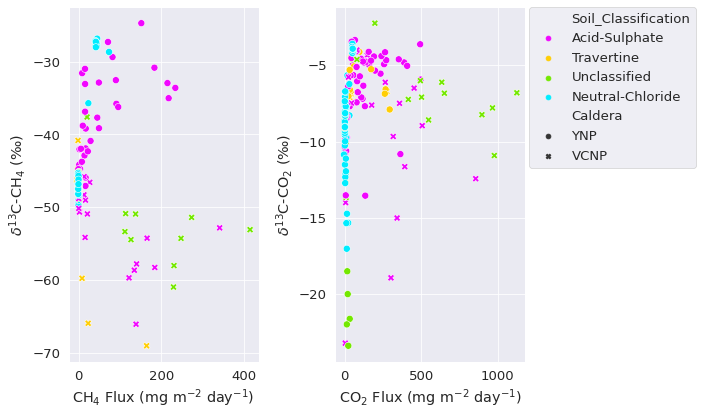

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
## CH4
plt.subplot(1,2,1)
ax = plt.gca()
sns.scatterplot(x="CH4_Flux", y="d13CH4_source", data=df_all_iso_trim,
                hue="Soil_Classification", palette="gist_ncar_r", s=50,
                style="Caldera", markers=markers)
ax.set(xlabel="CH$_4$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CH$_4$ (‰)")
plt.legend([],[], frameon=False)

## CO2
plt.subplot(1,2,2)
ax = plt.gca()
sns.scatterplot(x="CO2_Flux", y="d13CO2_source", data=df_all_iso_trim,
                hue="Soil_Classification", palette="gist_ncar_r", s=50,
                style="Caldera", markers=markers)
ax.set(xlabel="CO$_2$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CO$_2$ (‰)")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()
plt.savefig("figures/d13C_v_flx_trim.png", dpi=300)

Figure ##: 

Next, density (kernel density estimate, kde) plot is used to understand the shape of the distribution of isotopes. 

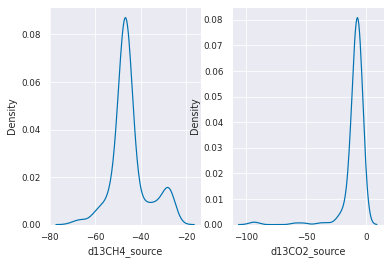

In [ ]:
## CH4
plt.subplot(1,2,1)
sns.kdeplot(data=df_all_iso_trim, x="d13CH4_source")

## CO2
plt.subplot(1,2,2)
sns.kdeplot(data=df_all_iso_trim, x="d13CO2_source")

plt.show()

---likely bimodel that will show up in the GSA for both---

#### Assess the Distribution of Carbon Isotopes
Just like with the fluxes, analyze which distributions will best fit the carbon isotopic data.

In [ ]:
df_all_iso_trim.dtypes

Site_Name                                  object
Group                                      object
Location                                   object
Soil_Classification                        object
Latitude                                  float64
Longitude                                 float64
Date_of_Measurement                datetime64[ns]
Start_Time_of_Chamber_Enclosure    datetime64[ns]
End_Time_of_Chamber_Enclosure      datetime64[ns]
Duration_of_Chamber_Enclosure             float64
CH4_Flux                                  float64
Long_Term CH4_Flux                         object
d13CH4_source                             float64
LowerBound_d13CH4_source                  float64
UpperBound_d13CH4_source                  float64
CO2_Flux                                  float64
Long_Term_CO2_Flux                         object
d13CO2_source                              object
LowerBound_d13CO2_source                  float64
UpperBound_d13CO2_source                  float64


In [ ]:
  # Create an errorbar function for plotting
def errplot(x, y, xerr, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, xerr=xerr, yerr=yerr,
              kind="scatter", ax=ax, **kwargs)

In [ ]:
## Quantify error for the fluxes
df_all_iso_trim["CH4_Flux_err"] = df_all_iso_trim.UpperBound_CH4_Flux - df_all_iso_trim.LowerBound_CH4_Flux

## CH4
fg = sns.FacetGrid(df_all_iso_trim, hue="Soil_Classification",
                   col="Group", col_wrap=4, height=3,aspect=0.8,
                   sharex=False)
fg.map_dataframe(errplot, x="d13CO2_source", y="d13CH4_source", 
                 xerr="CH4_Flux_err", yerr="d13CH4_err")
fg.set(ylim=(-100,0),
       xlabel="CH$_4$ Flux (mg m$^{-2}$ day$^{-1}$)",
       ylabel="$\delta^{13}$C-CH$_4$ (‰)")
fg.tight_layout()
fg.add_legend()
plt.savefig("figures/faceted_d13CH4_v_CH4_Flux")

NameError: ignored

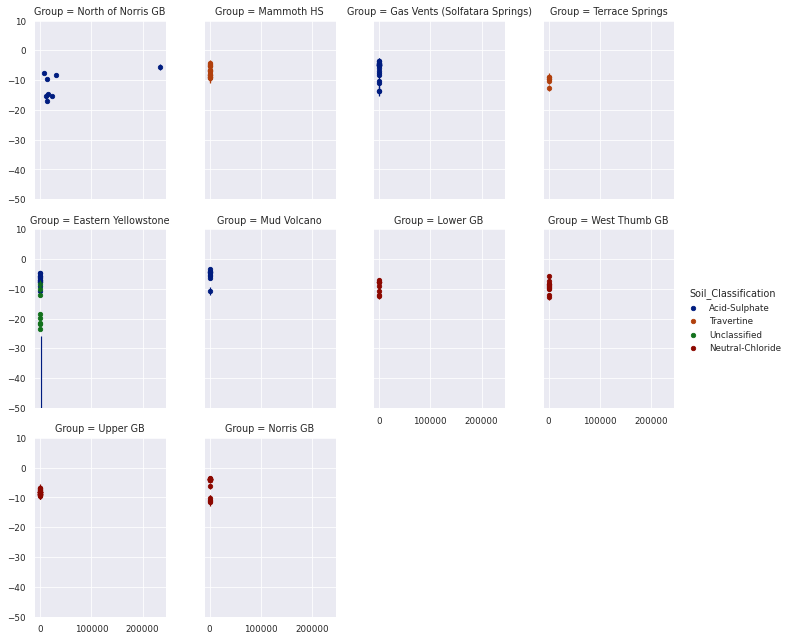

In [ ]:
## CO2
fg = sns.FacetGrid(df_all_iso_trim, hue="Soil_Classification",
                   col="Group", col_wrap=4, height=3,aspect=0.8,
                   sharex=True)
fg.map_dataframe(errplot, x="CO2_Flux", y="d13CO2_source", yerr="d13CO2_err")
fg.set(ylim=(-50,10))
fg.tight_layout()
fg.add_legend()
plt.savefig("figures/faceted_d13CO2_v_CO2_Flux")

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(pval_conover_CO2, linewidths=0.35, cmap="Greys_r", 
                 square=True, fmt=".2f",
                 annot=True, annot_kws={"color":"white", "weight":"bold"})
ax.invert_yaxis()
plt.tight_layout()
plt.savefig("figures/CO2_flx_CI_tst.png", dpi=300)

NameError: ignored